# ML Models for Diamond Price Prediction: Regression Problem

## Table of contents
---------------------------------------------
-  Import  Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Features
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Engineering 
-  Feature Selection
-  Statistics Analysis
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
-  Predication
-  Save The Machien Learning Models 

# Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

#   Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

##      Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##      Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##      Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#   Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

#   Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

#   Feature Selection
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.
from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for Regression tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for Regression tasks.

#   Data Splitting 
from sklearn.model_selection import train_test_split

#   sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import accuracy_score # To get the accuracy score 

#   Supervised Machine Learning Models
##      Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

##      Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

##      Histogram-based Gradient Boosting Regression Tree
from sklearn.ensemble import HistGradientBoostingRegressor

##      AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

##      Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

##      K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

##      Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##      Linear Regressor with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDRegressor

##      XGBoost Regressor
from xgboost import XGBRegressor

##      Support Vector Machines Regressor
from sklearn.svm import SVR

##      Linear Support Vector Regression
from sklearn.svm import LinearSVR

##      Multilayer Perceptron Regressor
from sklearn.neural_network import MLPRegressor

#   Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Save and Load the Machine Learning Models 
import pickle

# Function Helper

In [2]:
'''
Read Dataset
'''
def CSV_File(path): 

    df_csv = pd.read_csv(path)

    return df_csv

      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):

    missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

    return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):

    print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
        colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):

    null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
    
    return null_data

def replace_NA_by_0(df_replace, Col_NA_TO_Zero):

    if Col_NA_TO_Zero !=[]:
        df_replace[Col_NA_TO_Zero] = df_replace[Col_NA_TO_Zero].fillna(0) # if the Varibles is str we use '0', else 0
        
    return df_replace

def replace_0_by_NA(df_replace, col_0_to_NA):

    df_replace[col_0_to_NA] = df_replace[col_0_to_NA].replace('0', np.nan) # if the Varibles is str we use '0', else 0

    return df_replace

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):

    Obj = df_split.select_dtypes(include = ['object'])
    Num = df_split.select_dtypes(include = np.number) 

    return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):
            fig = px.histogram(df_EDA, x=target)
            fig.show()
            

def EDA_target2(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):

            df_EDA.boxplot(column=target, figsize=(30, 20))
            plt.show()
        
def obj_EDA(df_EDA, cols):

    for col in cols:
        table = pd.DataFrame(df_EDA[col].value_counts())
        print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
        plt.figure(figsize = (40, 20))
        df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
        plt.title(col)
        plt.show()

def EDA_obj(df_EDA, cols, Target):

    for col in cols:
        print('Variable Name: ', df_EDA[col].name)
        pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):

    for col in cols: 
        fig, ax = plt.subplots(figsize=(30, 20))
        df_EDA.hist(column=[col], ax=ax )

def EDA_num_2(df_EDA, cols):

    for col in cols: 
        df_EDA.boxplot(column=col, figsize=(30, 20))
        plt.show()
    
def EDA_num_with_DV(df_eda, NUMcols_eda, target): 

    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue = target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):

    for col in list(dataframe_series.columns):
        if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                print ('\nStandardization Applied On:', col)
                dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

    return dataframe_series
    
'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le_orig = preprocessing.LabelEncoder()

    df_old = dataframe_series.copy(deep = False)

    if dataframe_series.dtype=='object':
        col = dataframe_series.name

        dataframe_series = le.fit_transform(dataframe_series)
        print('\nLable Encoding Applied On:', col)

        le.fit(dataframe_series)
        print('New Value for',col,' Variable:', le.classes_)

        le_orig.fit(df_old)
        print('Old Value for',col,'Variable:', le_orig.classes_)

    return dataframe_series

def ObjOneHotEncoder(dataframe_series, col):

    Futuer_array = ohe.fit_transform(dataframe_series[col]).toarray()
    Futuer_lable = ohe.get_feature_names_out(col)
    Futuer_lable = np.array(Futuer_lable).ravel()
    features = pd.DataFrame(Futuer_array, columns=Futuer_lable )
    dataframe_series = dataframe_series.drop(columns=col)
    dataframe_series = pd.concat([dataframe_series , features], axis=1)
    print ('\nOne Hote Encodeing Applied On:', col)

    return dataframe_series

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):

    # Split the df into Obj and Num
    obj, num = Data_Splitting_Num_Obj(df_forward)

    list_df_num = list(num.columns)
    if target not in list_df_num: 
        list_df_num.append(target)
    print('All the Num Variables:',list_df_num)

    list_df_Obj = list(obj.columns)
    print('\nAll the obj Variables:',list_df_Obj)

    # Create New DataFrame Hvae only the Num Variables
    df_num = df_forward[list_df_num]

    # define dataset
    X = df_num.drop(target, axis=1)
    y = df_num[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forward_FS = SequentialFeatureSelector(RandomForestRegressor(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                k_features= (1, X.shape[1]),
                                                                forward=True,
                                                                floating=False,
                                                                scoring = 'neg_mean_squared_error', # mean_squared_error, neg_mean_squared_error
                                                                verbose=2,
                                                                cv= 5
                ).fit(X_train, y_train)

    new_list_num = list(forward_FS.k_feature_names_)

    print ('\nMost Variables Can Effect The Target Variables: ',new_list_num)
    print ('\nWith Highest Score: ',forward_FS.k_score_)

    
    if target not in new_list_num: 
        new_list_num.append(target)
    print('\nAll the Variables Selected: ',new_list_num)

    new_df_list = new_list_num + list_df_Obj
    df_forward = df_forward[new_df_list]

    forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

    return df_forward, forward_FS 

def Save_ML(ML_Name, _ml):

    i = 0 

    for ML in ML_Name:

        with open(ML, "wb") as file:
            
            print(f'Create file name {ML}')

            pickle.dump(_ml[i], file)
            print('Model:', _ml[i], 'Saved\n')

        i += 1  

# Import Dataset & Data Description

## Import Dataset

In [3]:
Path = '/content/diamonds.csv'
file_type = 'C'

if file_type == 'C':
    df = CSV_File(Path)

In [4]:
pd.DataFrame(df.head(10))

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.230,Ideal,E,SI2,61.500,55.000,326,3.950,3.980,2.430
1,0.210,Premium,E,SI1,59.800,61.000,326,3.890,3.840,2.310
2,0.230,Good,E,VS1,56.900,65.000,327,4.050,4.070,2.310
3,0.290,Premium,I,VS2,62.400,58.000,334,4.200,4.230,2.630
4,0.310,Good,J,SI2,63.300,58.000,335,4.340,4.350,2.750
5,0.240,Very Good,J,VVS2,62.800,57.000,336,3.940,3.960,2.480
6,0.240,Very Good,I,VVS1,62.300,57.000,336,3.950,3.980,2.470
7,0.260,Very Good,H,SI1,61.900,55.000,337,4.070,4.110,2.530
8,0.220,Fair,E,VS2,65.100,61.000,337,3.870,3.780,2.490
9,0.230,Very Good,H,VS1,59.400,61.000,338,4.000,4.050,2.390


# Data Understanding

In [5]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
-------------------------------------------------------------------------------
Missing Values for Catuogirical Dataset:
         Missing_Number  Missing_Percent
carat                 0            0.000
cut                   0            0.000
color                 0            0.000
clarity               0            0.000
depth                 0            0.000
t

In [6]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [7]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-------+---------+------------+-------------+-------+--------+---------+---------+----------+
|       |   count |       mean |         std |   min |    25% |     50% |     75% |      max |
|-------+---------+------------+-------------+-------+--------+---------+---------+----------|
| carat |   53940 |    0.79794 |    0.474011 |   0.2 |   0.4  |    0.7  |    1.04 |     5.01 |
| depth |   53940 |   61.7494  |    1.43262  |  43   |  61    |   61.8  |   62.5  |    79    |
| table |   53940 |   57.4572  |    2.23449  |  43   |  56    |   57    |   59    |    95    |
| price |   53940 | 3932.8     | 3989.44     | 326   | 950    | 2401    | 5324.25 | 18823    |
| x     |   53940 |    5.73116 |    1.12176  |   0   |   4.71 |    5.7  |    6.54 |    10.74 |
| y     |   53940 |    5.73453 |    1.14213  |   0   |   4.72 |    5.71 |    6.54 |    58.9  |
| z     |   53940 |    3.53873 |    0.705699 |   0   |   2.91 |    3.53 |    4.04 |    31.8  |
+-------+---------+------------+-------------+----

In [8]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+---------+---------+----------+-------+--------+
|         |   count |   unique | top   |   freq |
|---------+---------+----------+-------+--------|
| cut     |   53940 |        5 | Ideal |  21551 |
| color   |   53940 |        7 | G     |  11292 |
| clarity |   53940 |        8 | SI1   |  13065 |
+---------+---------+----------+-------+--------+


In [9]:
pd.DataFrame(df.var())

,0
carat,0.225
depth,2.052
table,4.993
price,15915629.424
x,1.258
y,1.304
z,0.498


# Select the Features

In [10]:
'''
                1)        Target Varibale
'''
target = 'price'

'''
                6)        Missing Value 
'''

Drop_All_Missing = 'Enable' # Enable or Disable


'''
                7)        Data Transformation
'''
DT = 'StandardScaler' # 'StandardScaler'  , or 'Disable'


'''
                8)        Featuers Selection And Featuers Engineering
'''
# Featuers
FE = 'OneHotEncoding' # 'OneHotEncoding' , or 'Disable'
FS = 'Forward' # 'Forward', or 'Disable'

'''
                10)        Data Splitting
'''
# Randomly
Random = 'Enable'
Split_size = 0.2 # Testing Size
Randon_state_size = 42
'''
                11)        Machine Learning Models 
'''
ML_ST = 'Enable'

'''  
                12)        Machine Learning Optimization 
'''
ML_OP = 'Disable'

# Data Pre-Processing

## Missing Value

In [11]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [12]:
if Drop_All_Missing == 'Enable':
    df = df.dropna()
    df = df.reset_index()
    df = df.drop(columns=['index'])
    missing_values_info(df)

Missing Values for Catuogirical Dataset:
         Missing_Number  Missing_Percent
carat                 0            0.000
cut                   0            0.000
color                 0            0.000
clarity               0            0.000
depth                 0            0.000
table                 0            0.000
price                 0            0.000
x                     0            0.000
y                     0            0.000
z                     0            0.000
-------------------------------------------------------------------------------


# Exploratory Data Analysis (EDA)

In [13]:
NUMcols = df.select_dtypes(np.number).columns
NUMcols = NUMcols.drop(target)

Objcols = df.select_dtypes(include = ['object']).columns

## Dependent Variables

In [14]:
EDA_target(df, target)

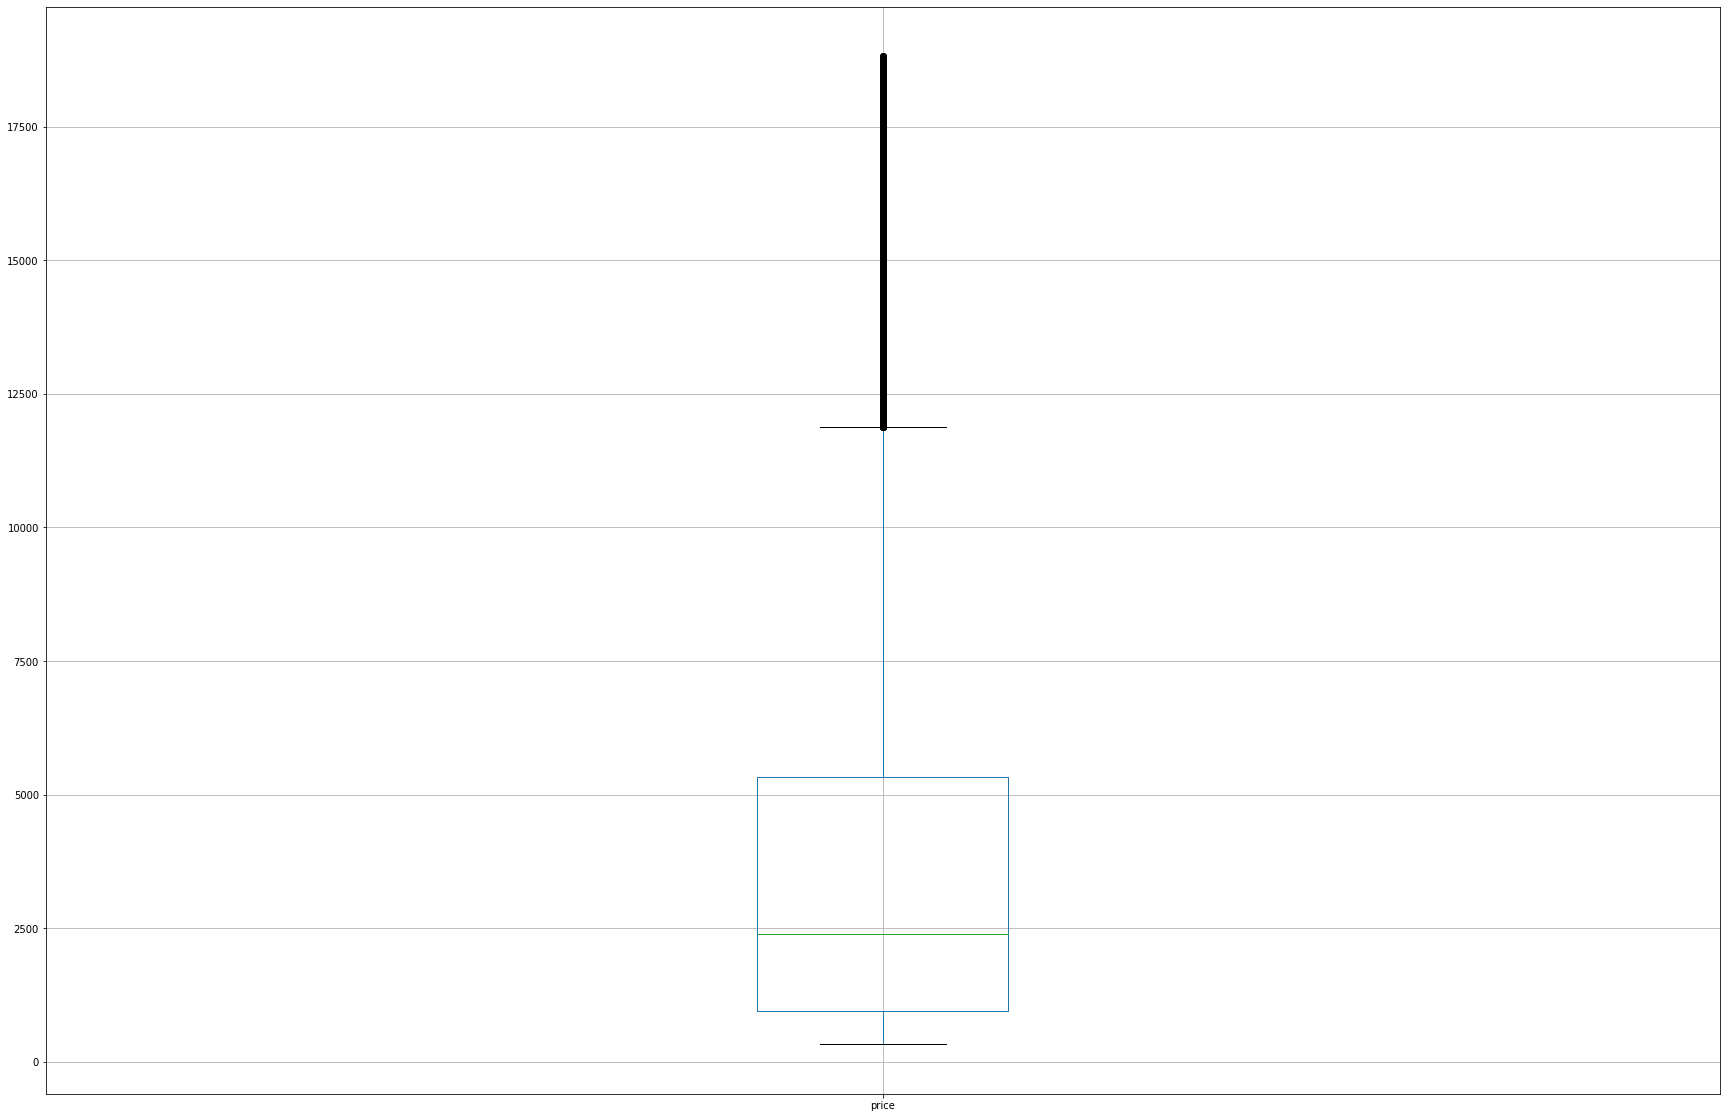

In [15]:
EDA_target2(df, target)

## Independent Dependent Variables

### Independent Dependent Variables (Object Variables) 

+-----------+-------+
|           |   cut |
|-----------+-------|
| Ideal     | 21551 |
| Premium   | 13791 |
| Very Good | 12082 |
| Good      |  4906 |
| Fair      |  1610 |
+-----------+-------+


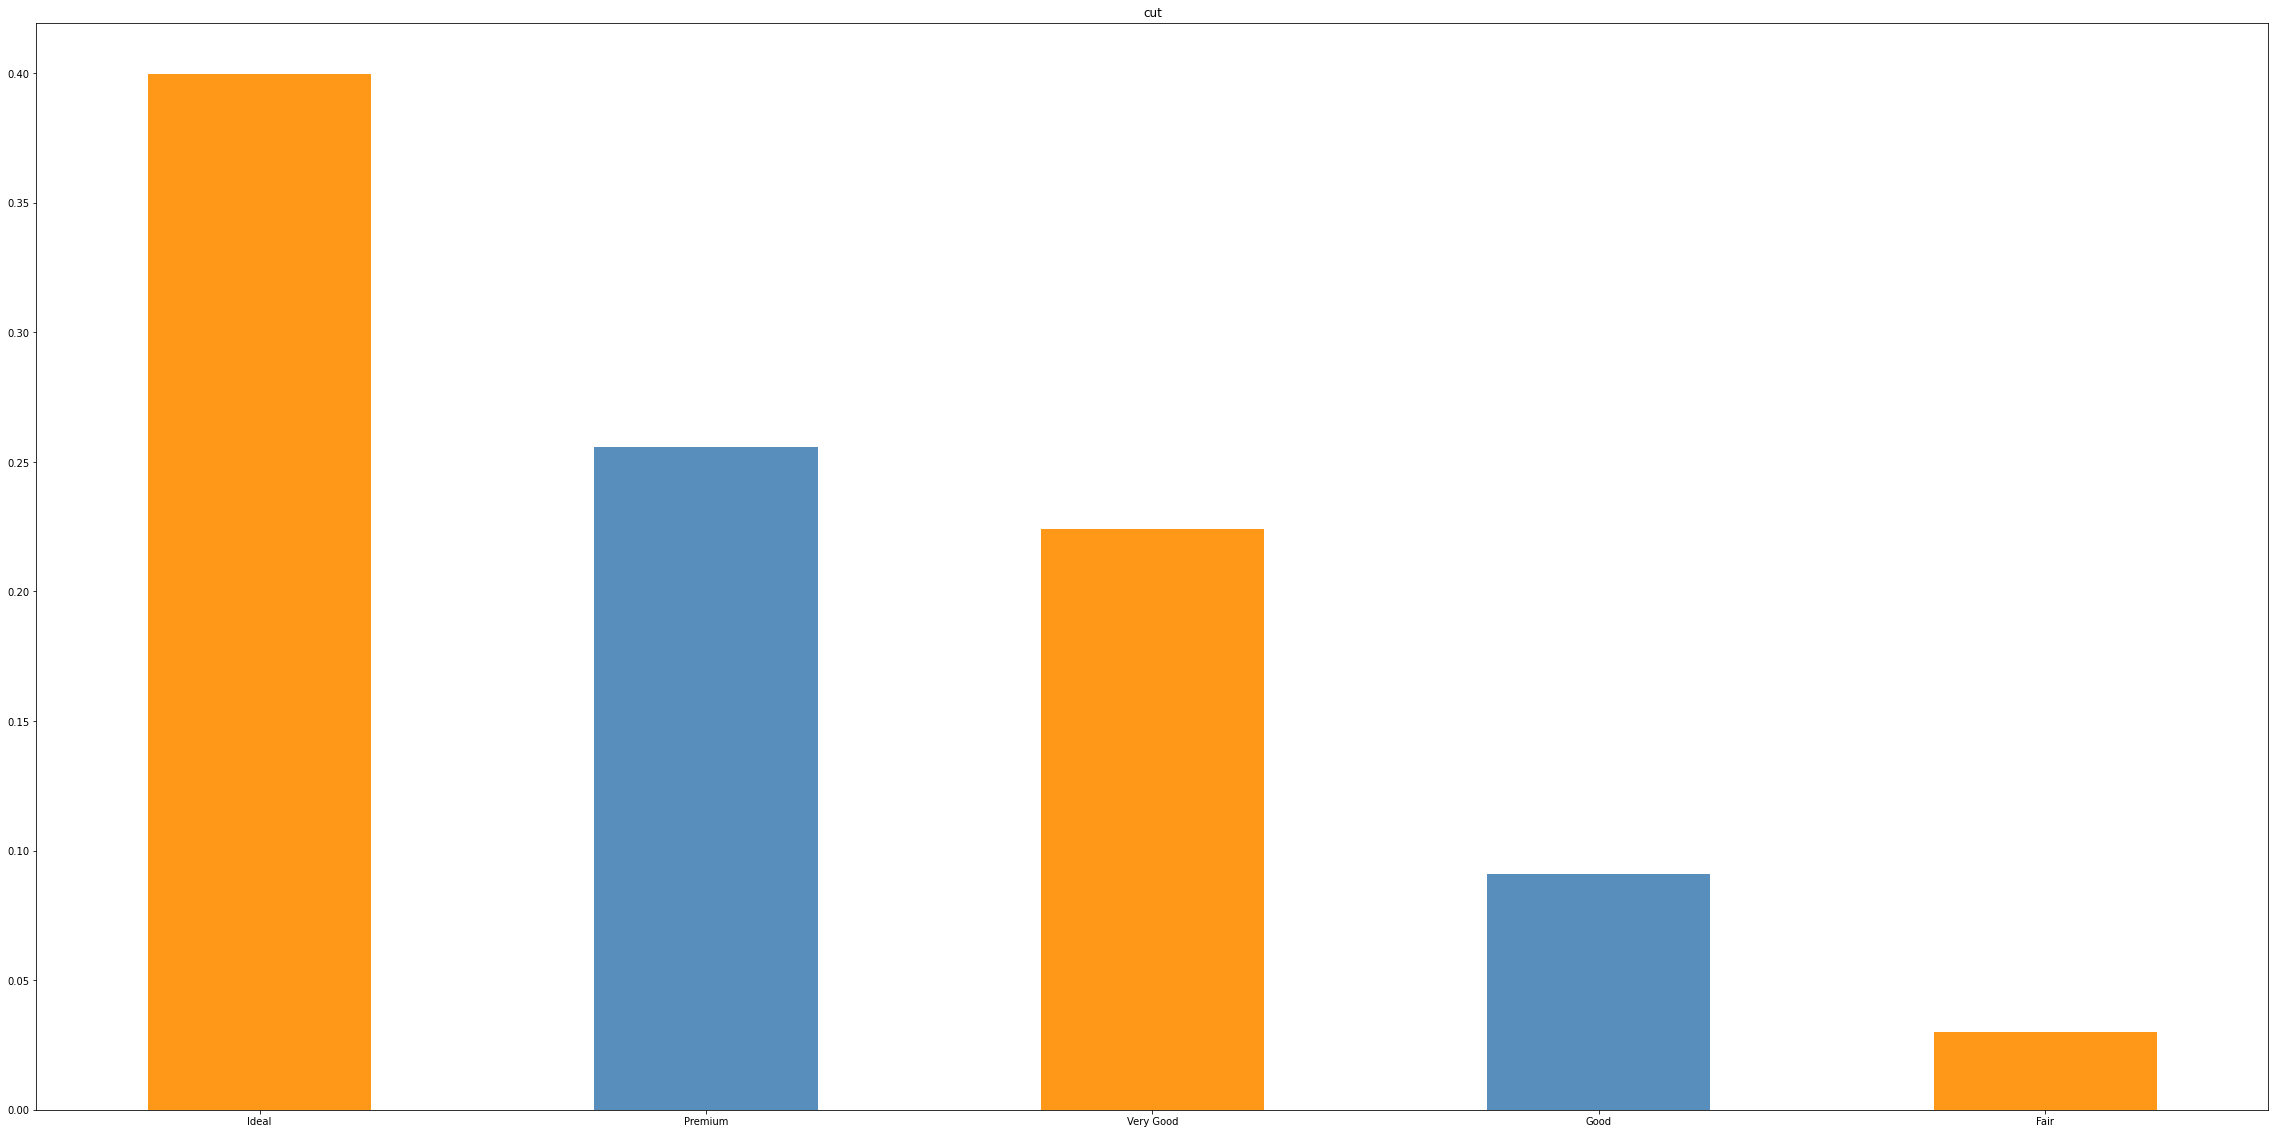

+----+---------+
|    |   color |
|----+---------|
| G  |   11292 |
| E  |    9797 |
| F  |    9542 |
| H  |    8304 |
| D  |    6775 |
| I  |    5422 |
| J  |    2808 |
+----+---------+


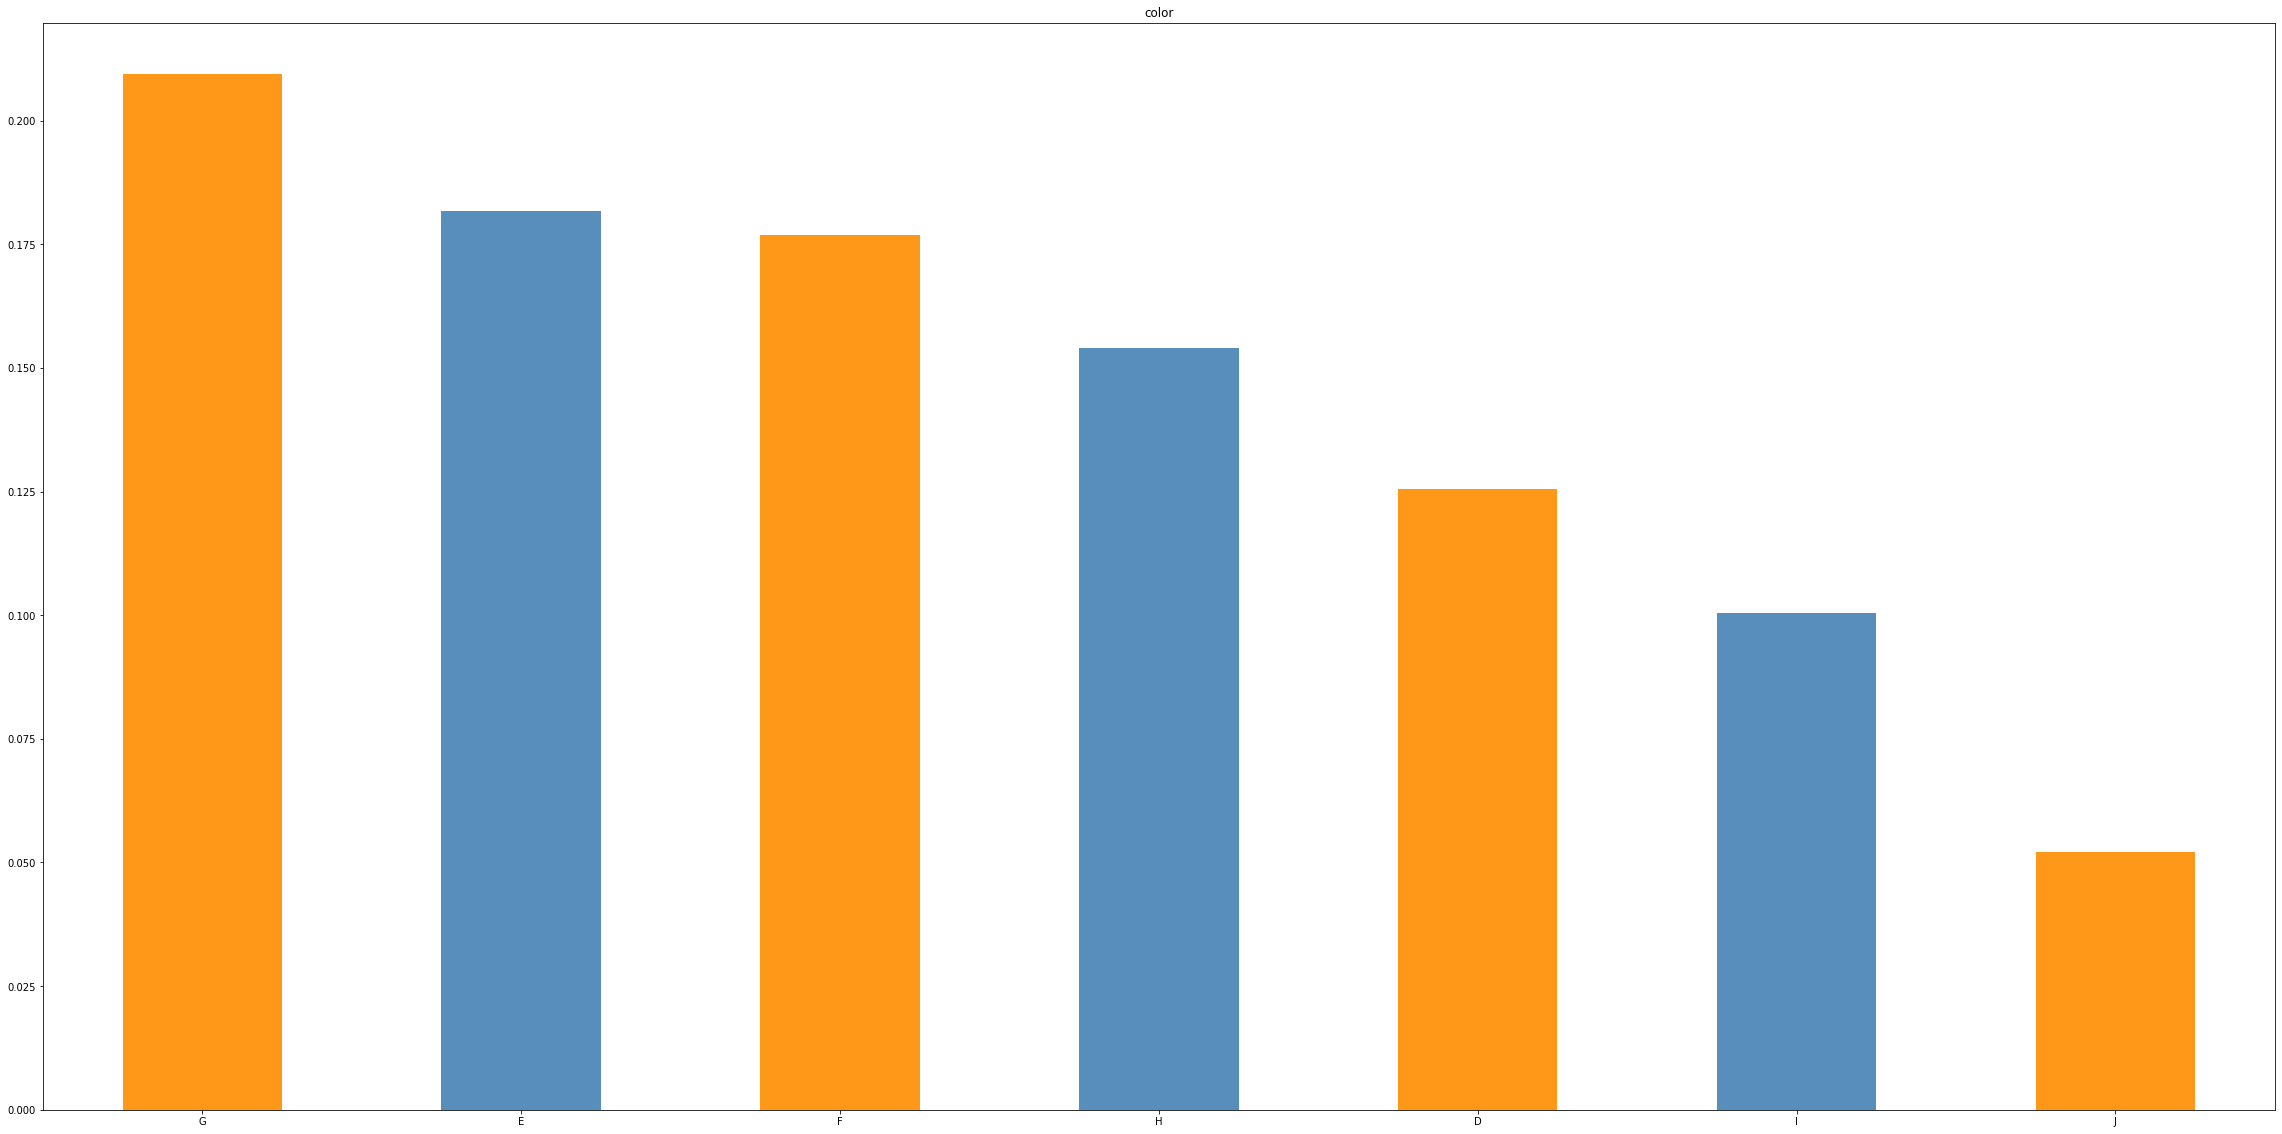

+------+-----------+
|      |   clarity |
|------+-----------|
| SI1  |     13065 |
| VS2  |     12258 |
| SI2  |      9194 |
| VS1  |      8171 |
| VVS2 |      5066 |
| VVS1 |      3655 |
| IF   |      1790 |
| I1   |       741 |
+------+-----------+


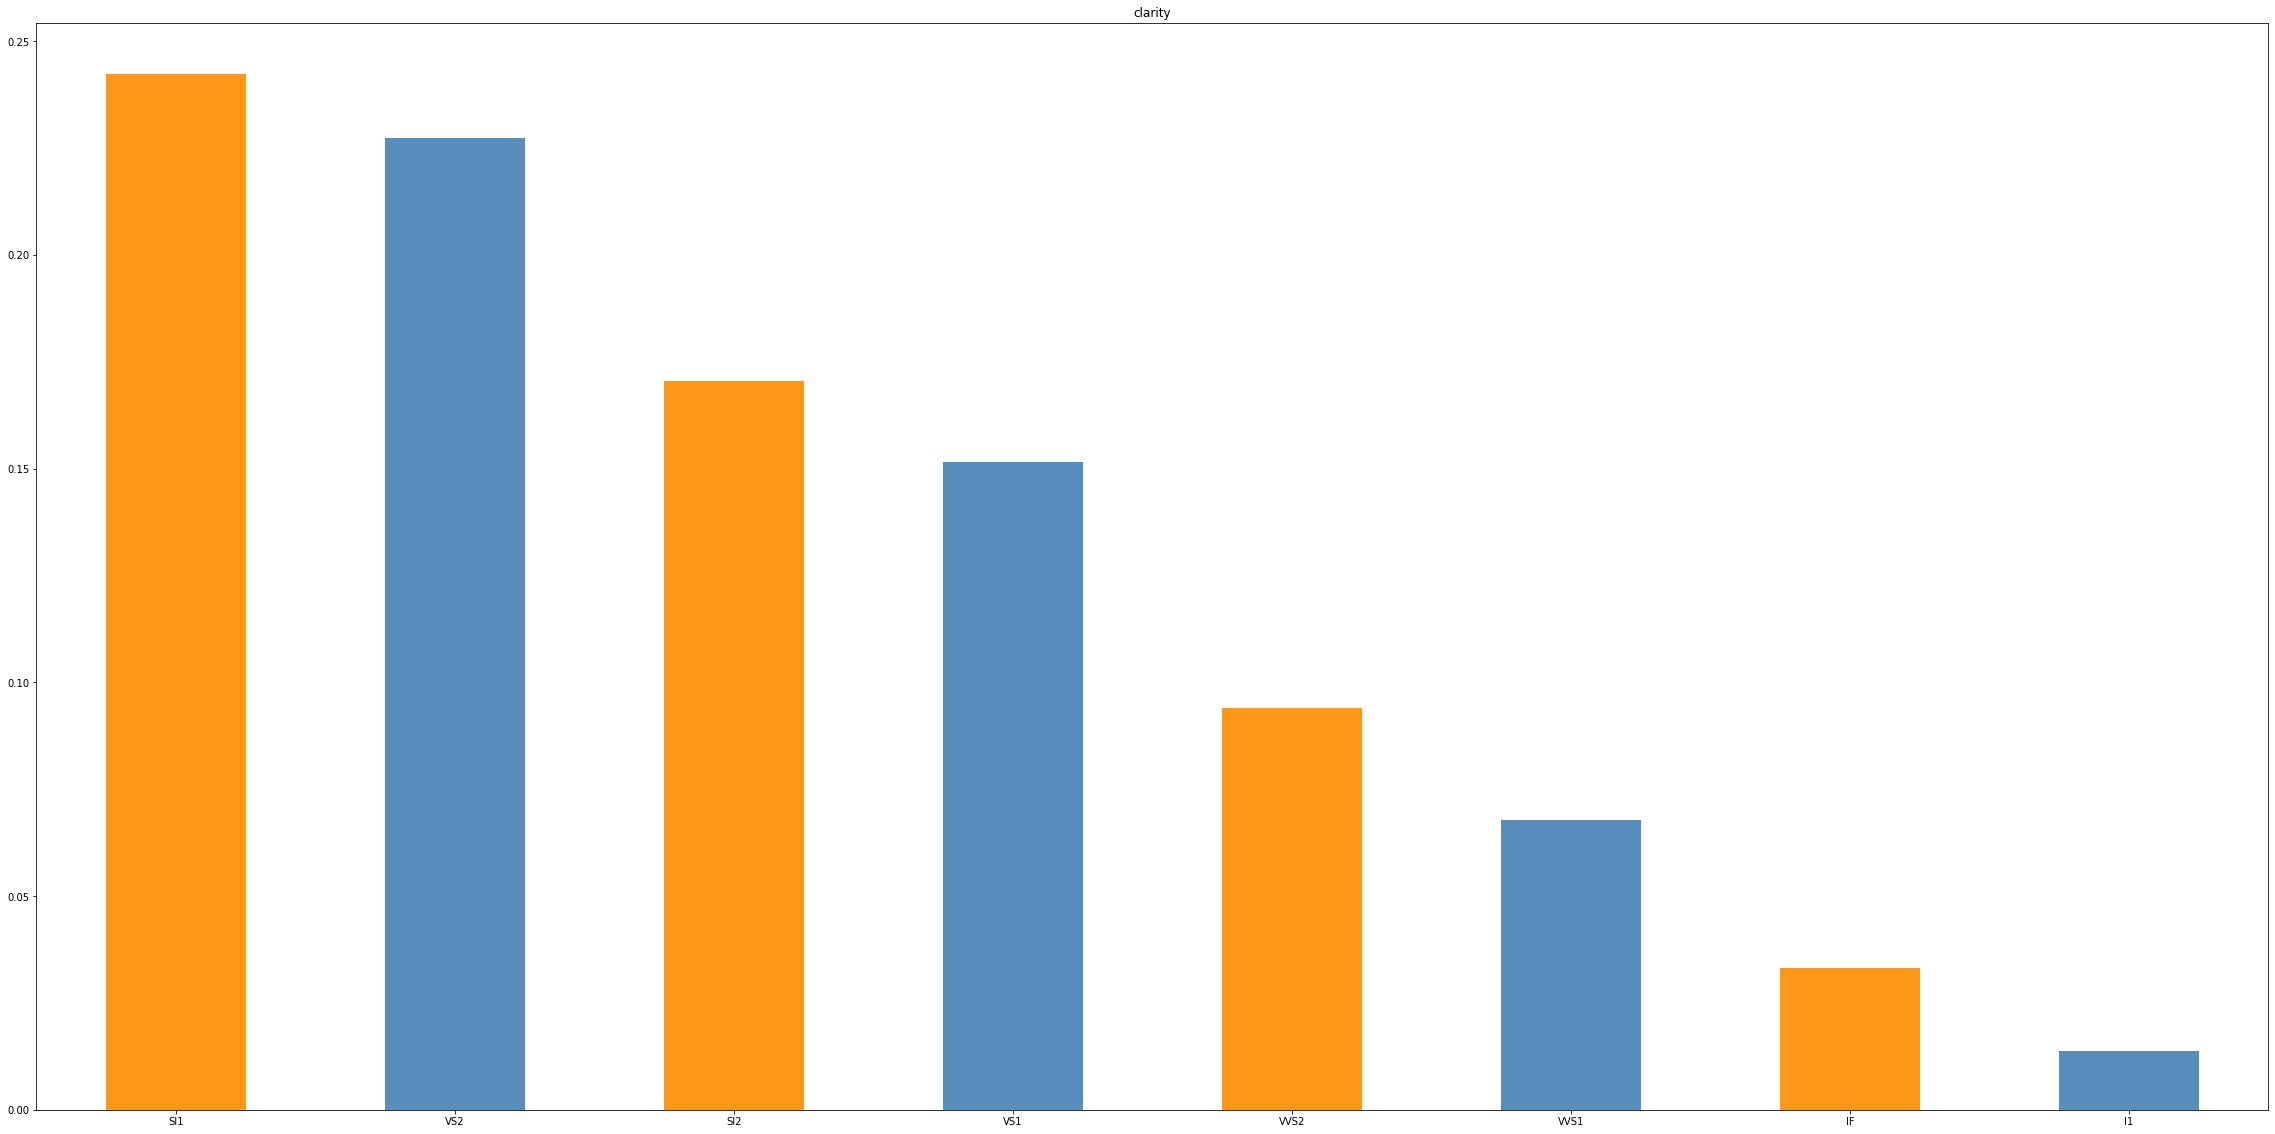

In [16]:
obj_EDA(df, Objcols)

### Independent Dependent Variables (Numerical)

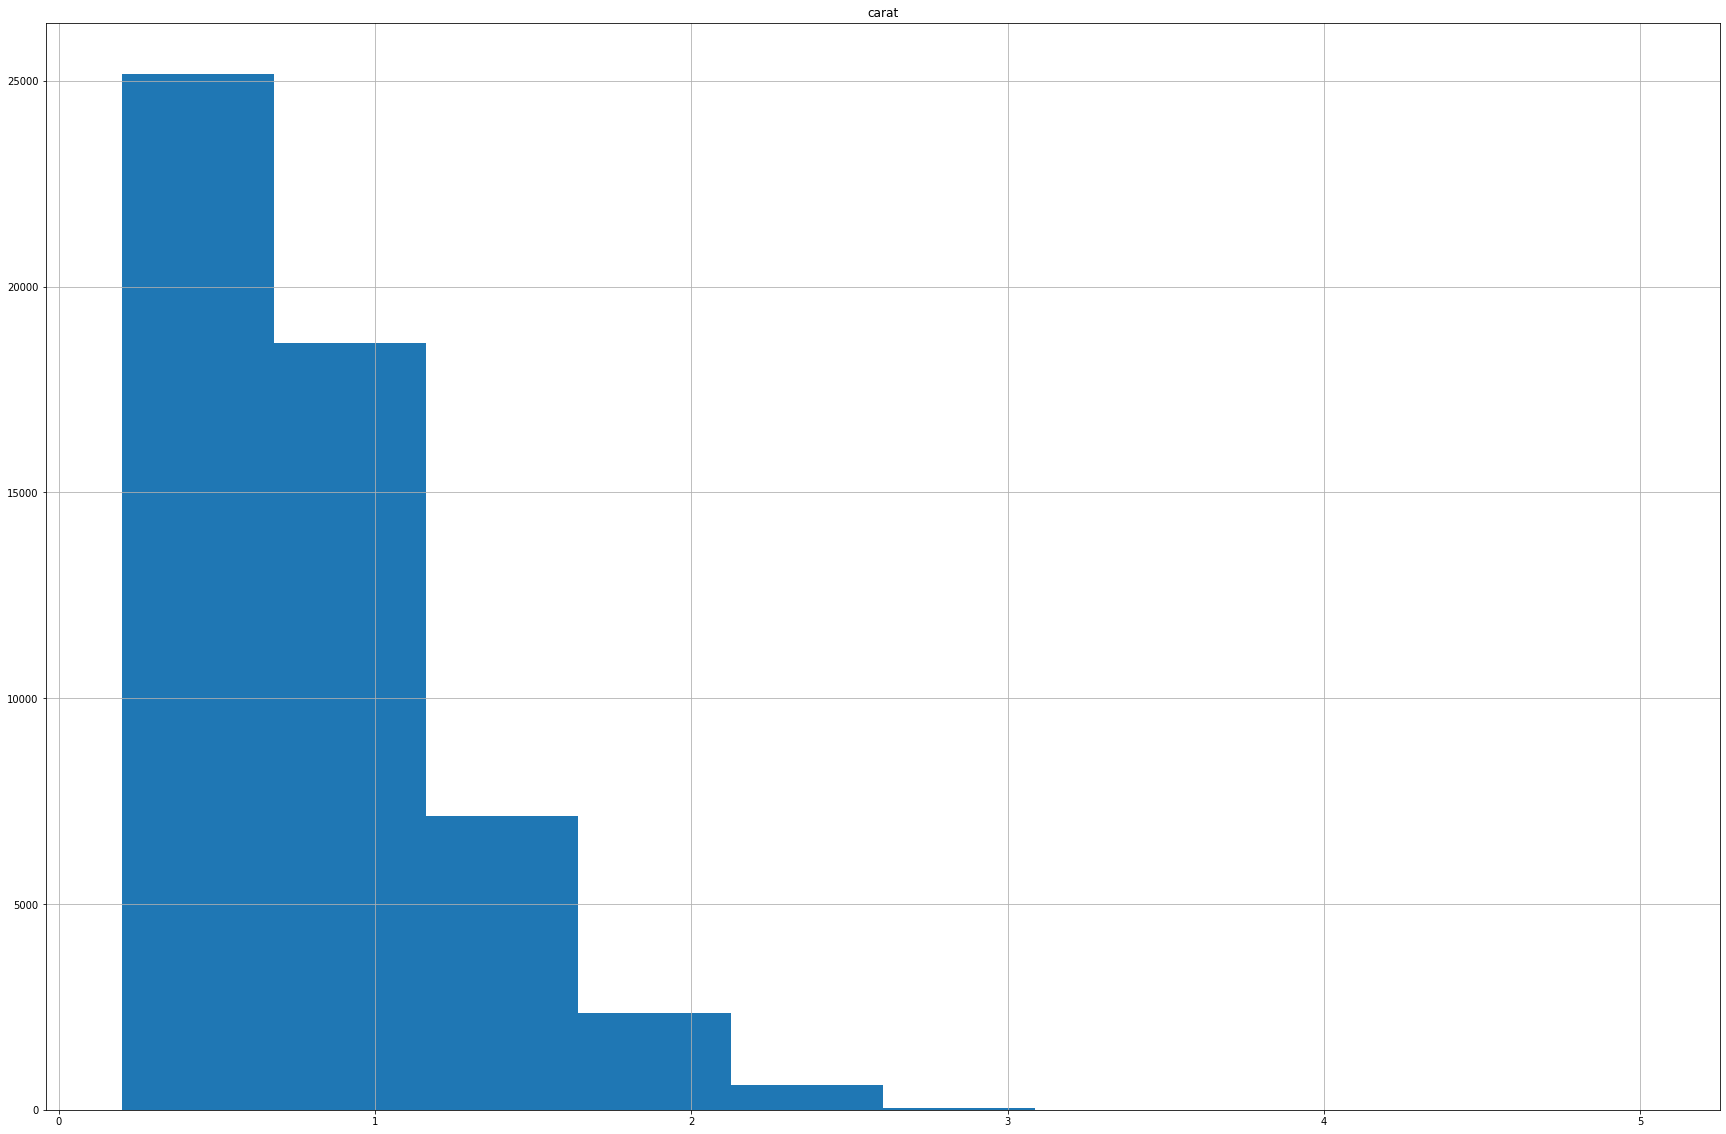

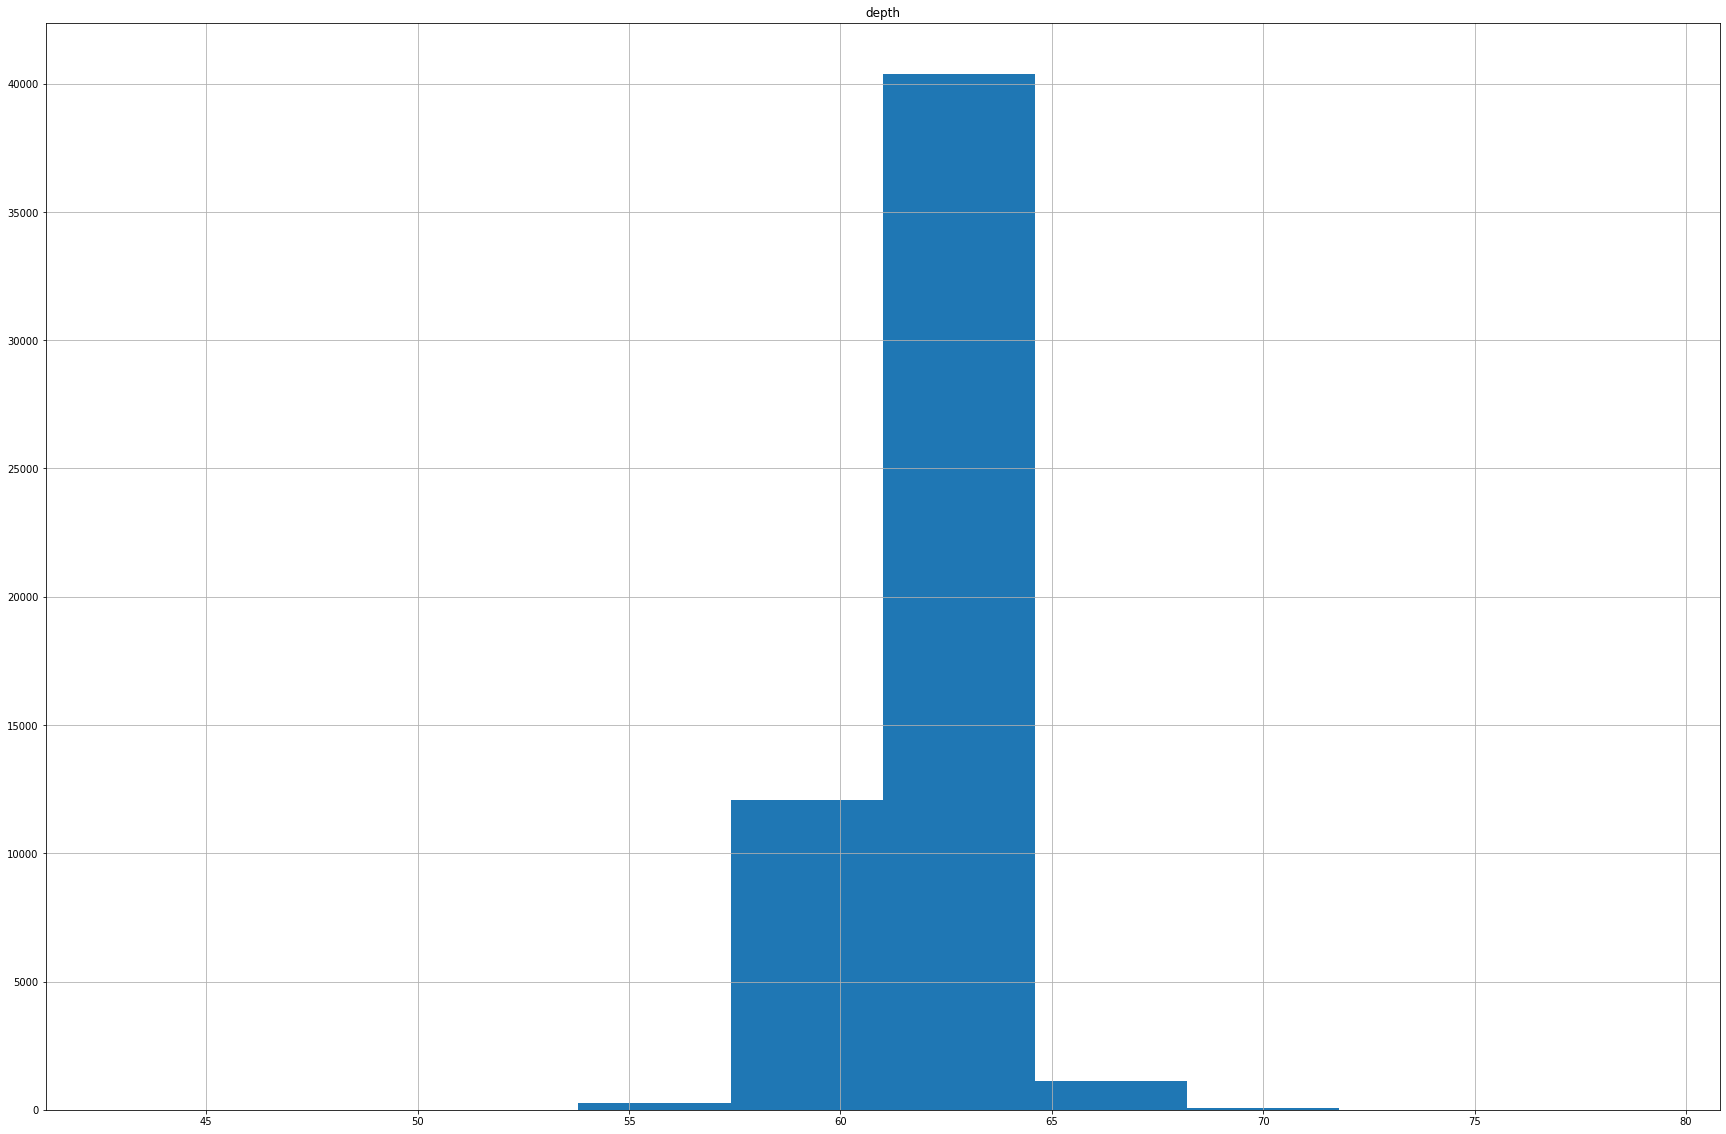

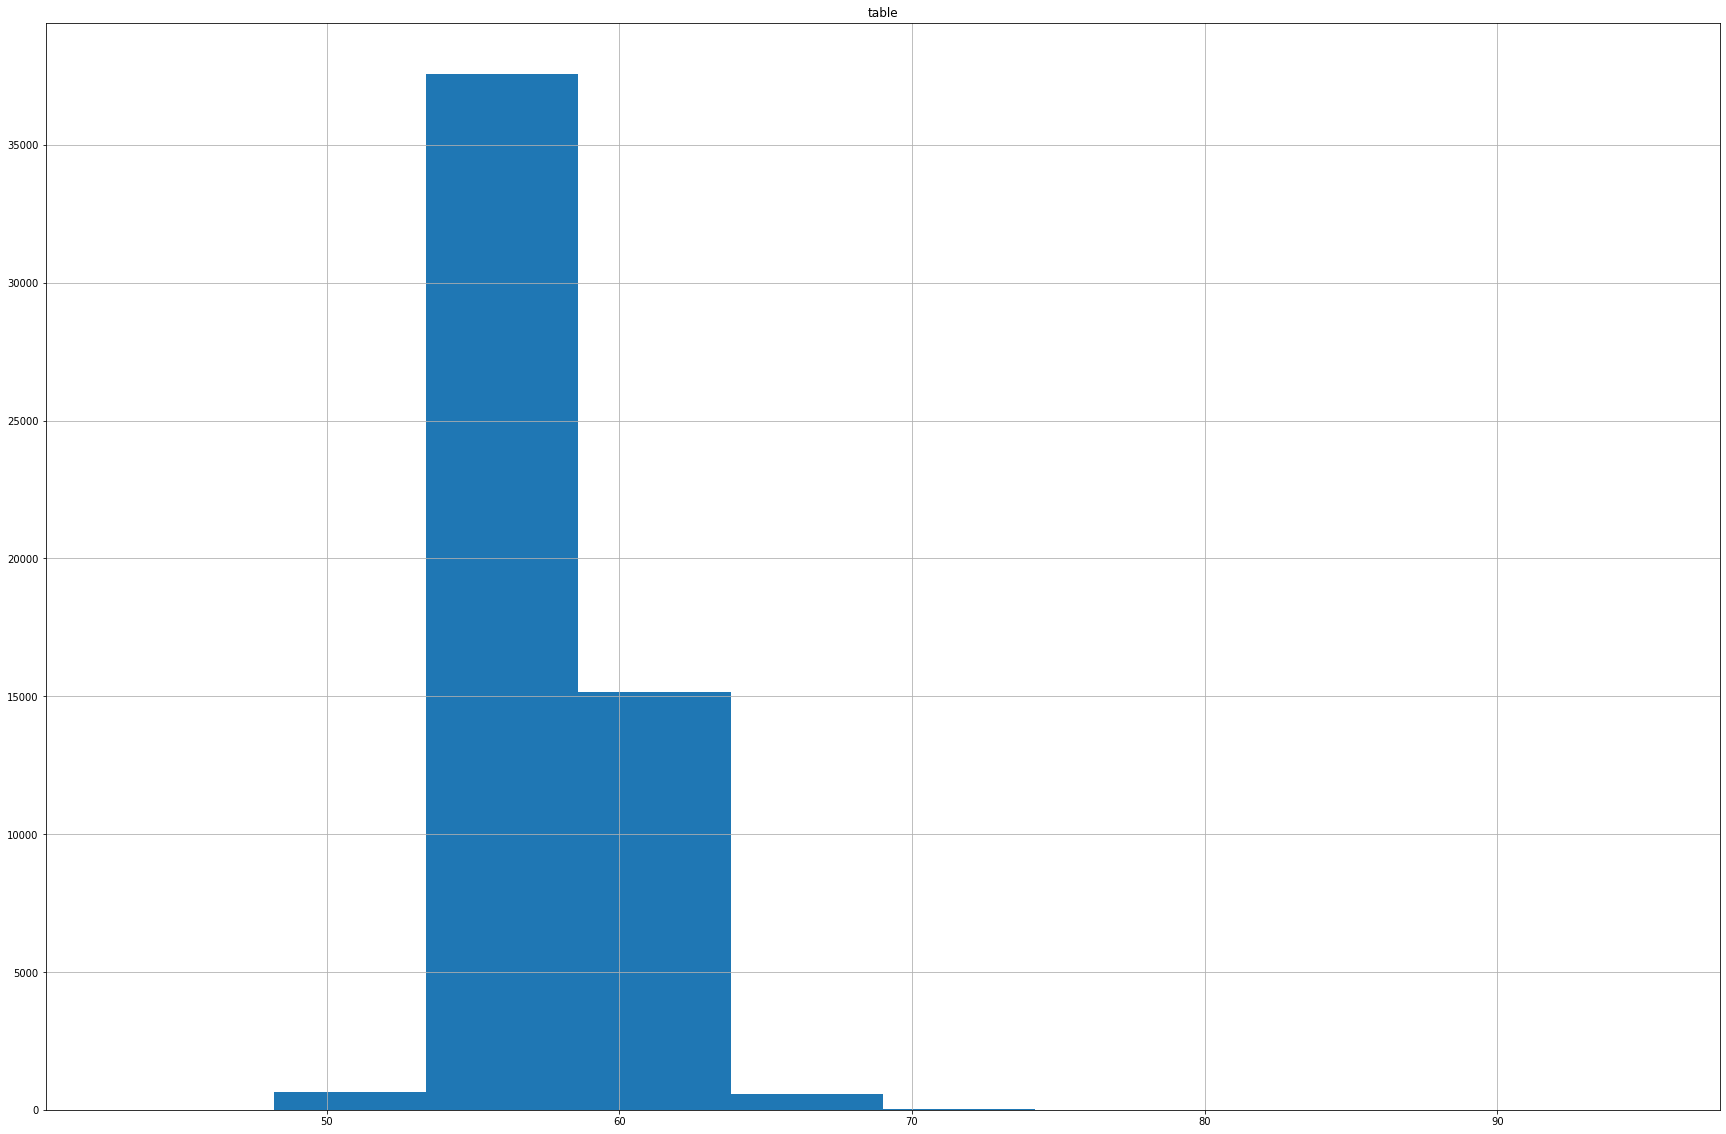

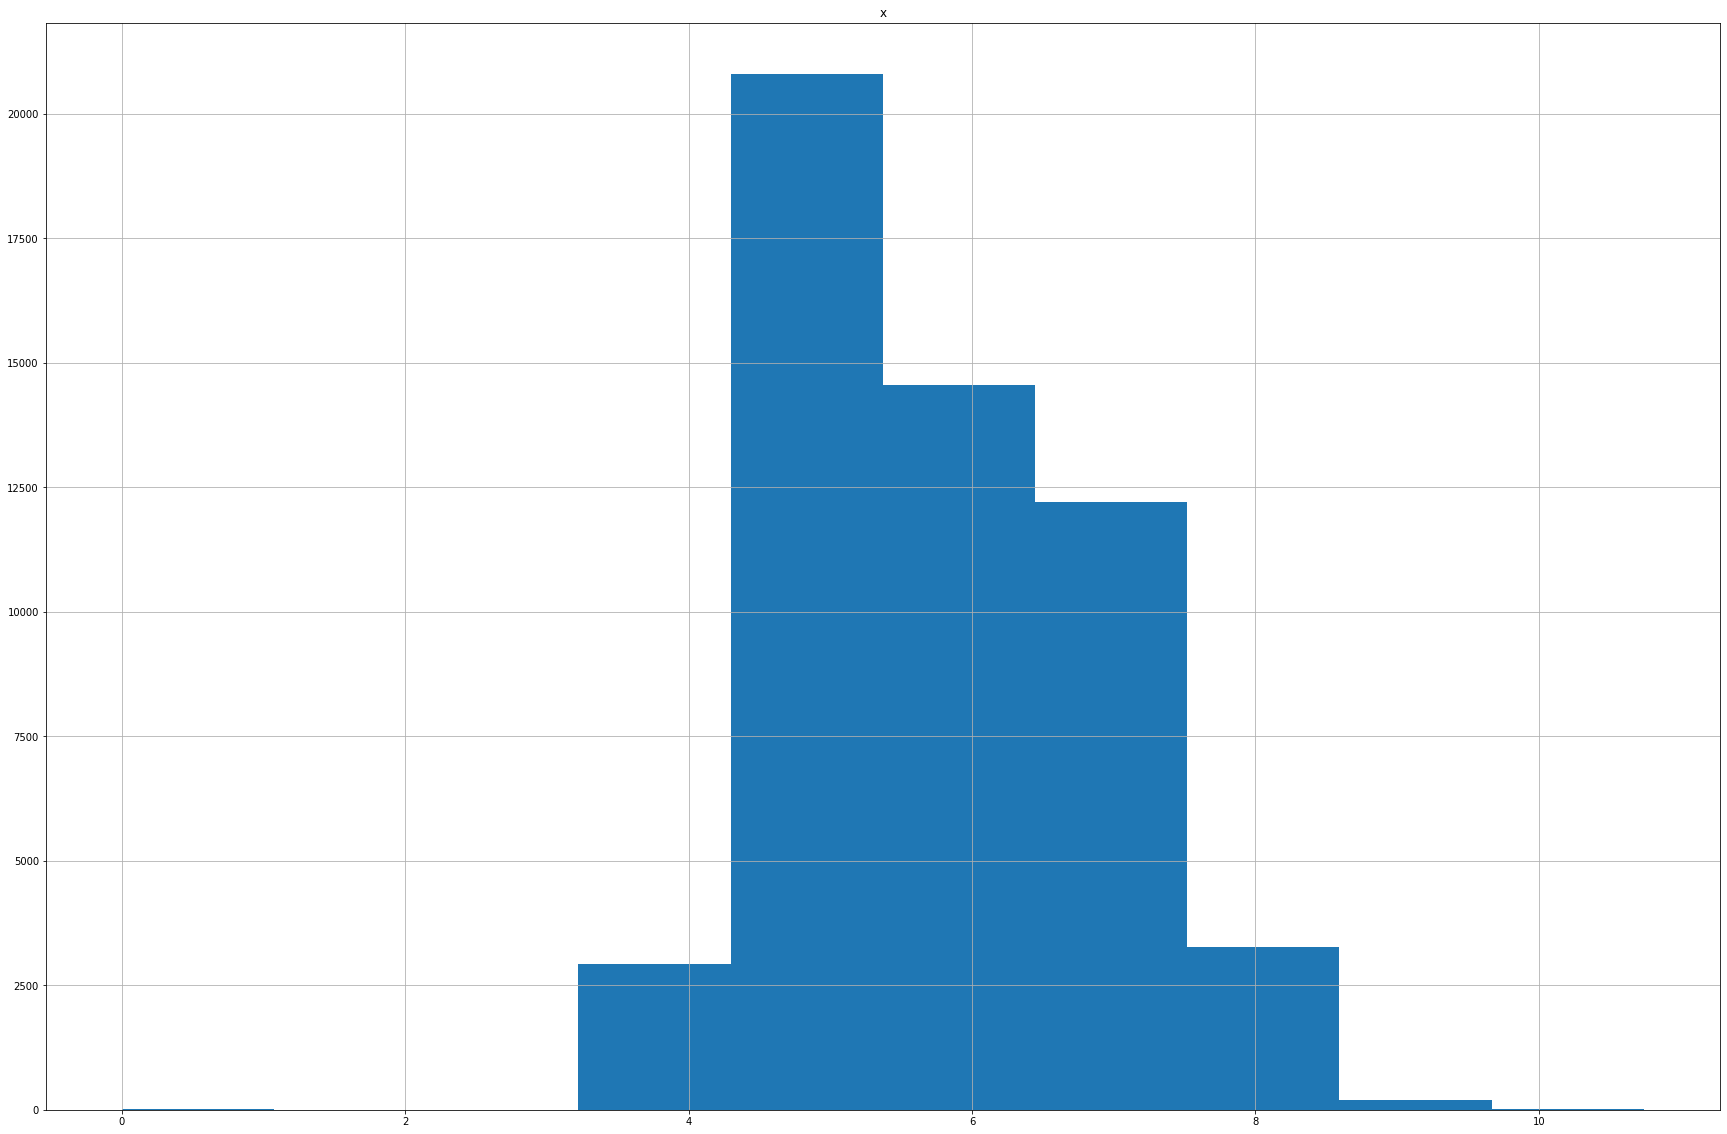

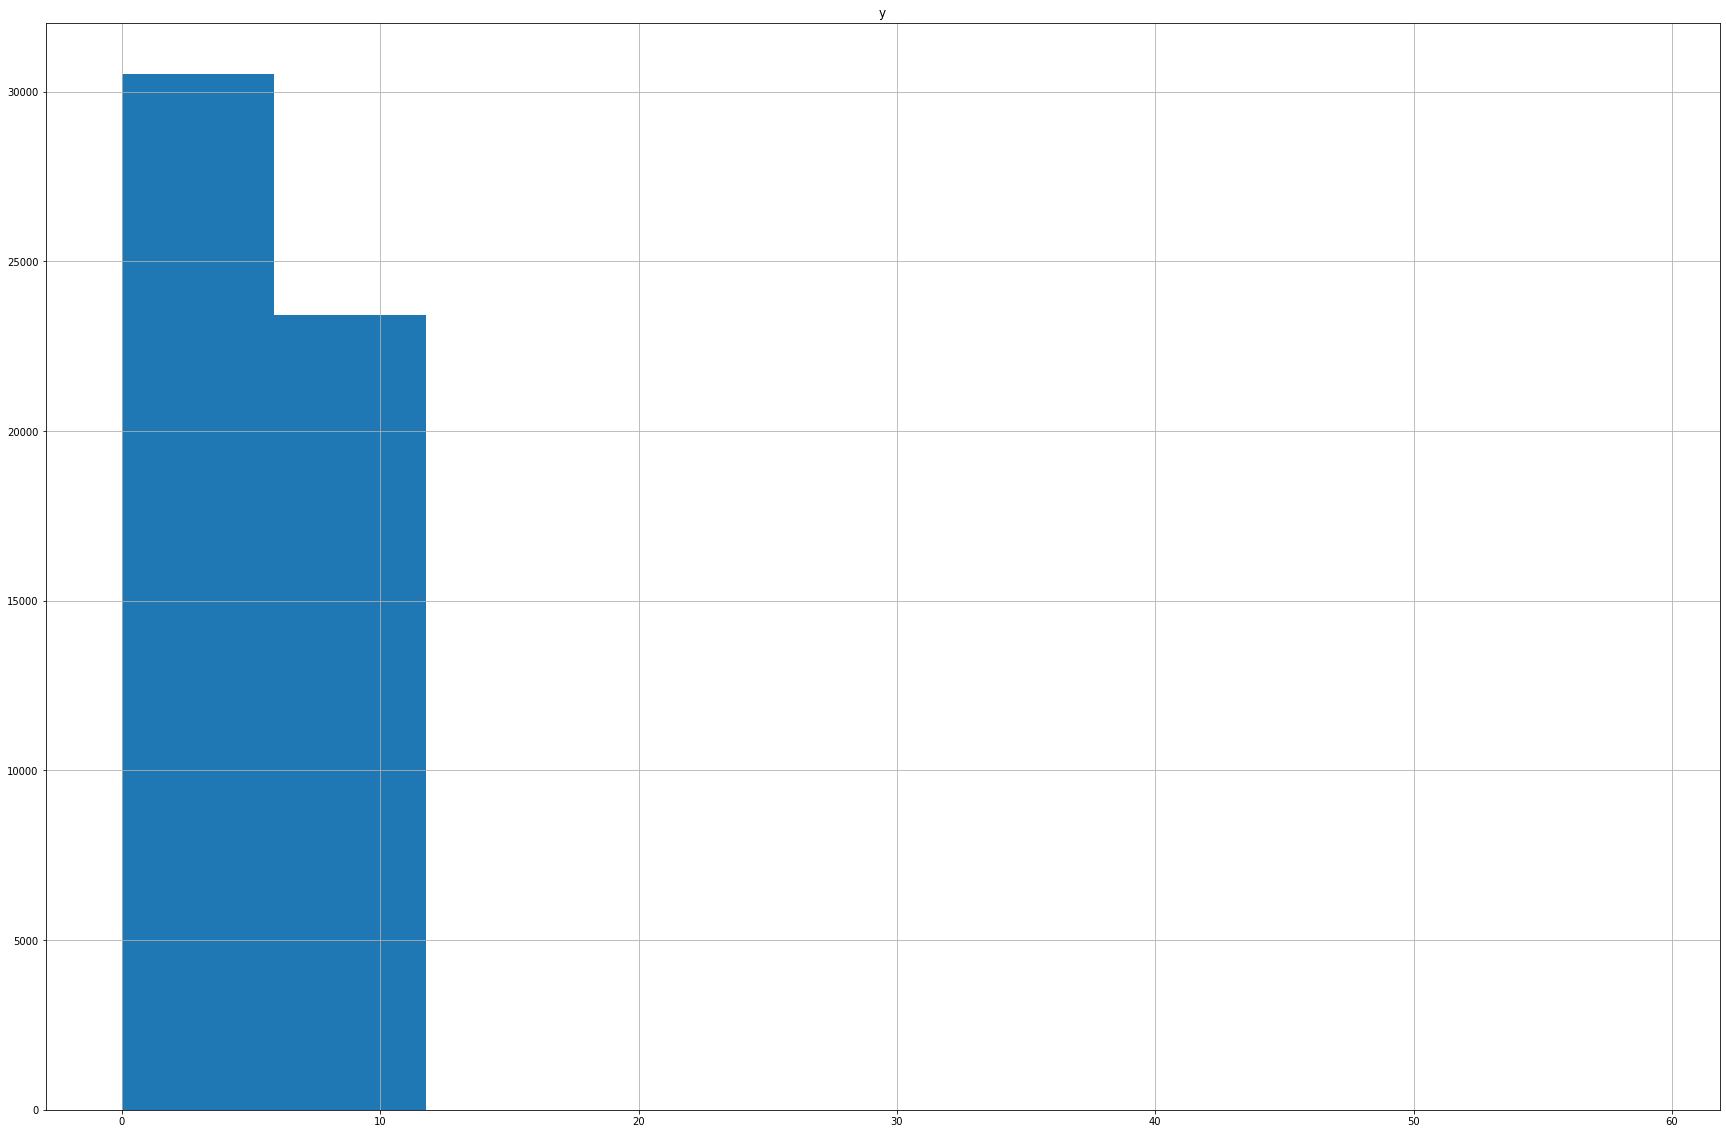

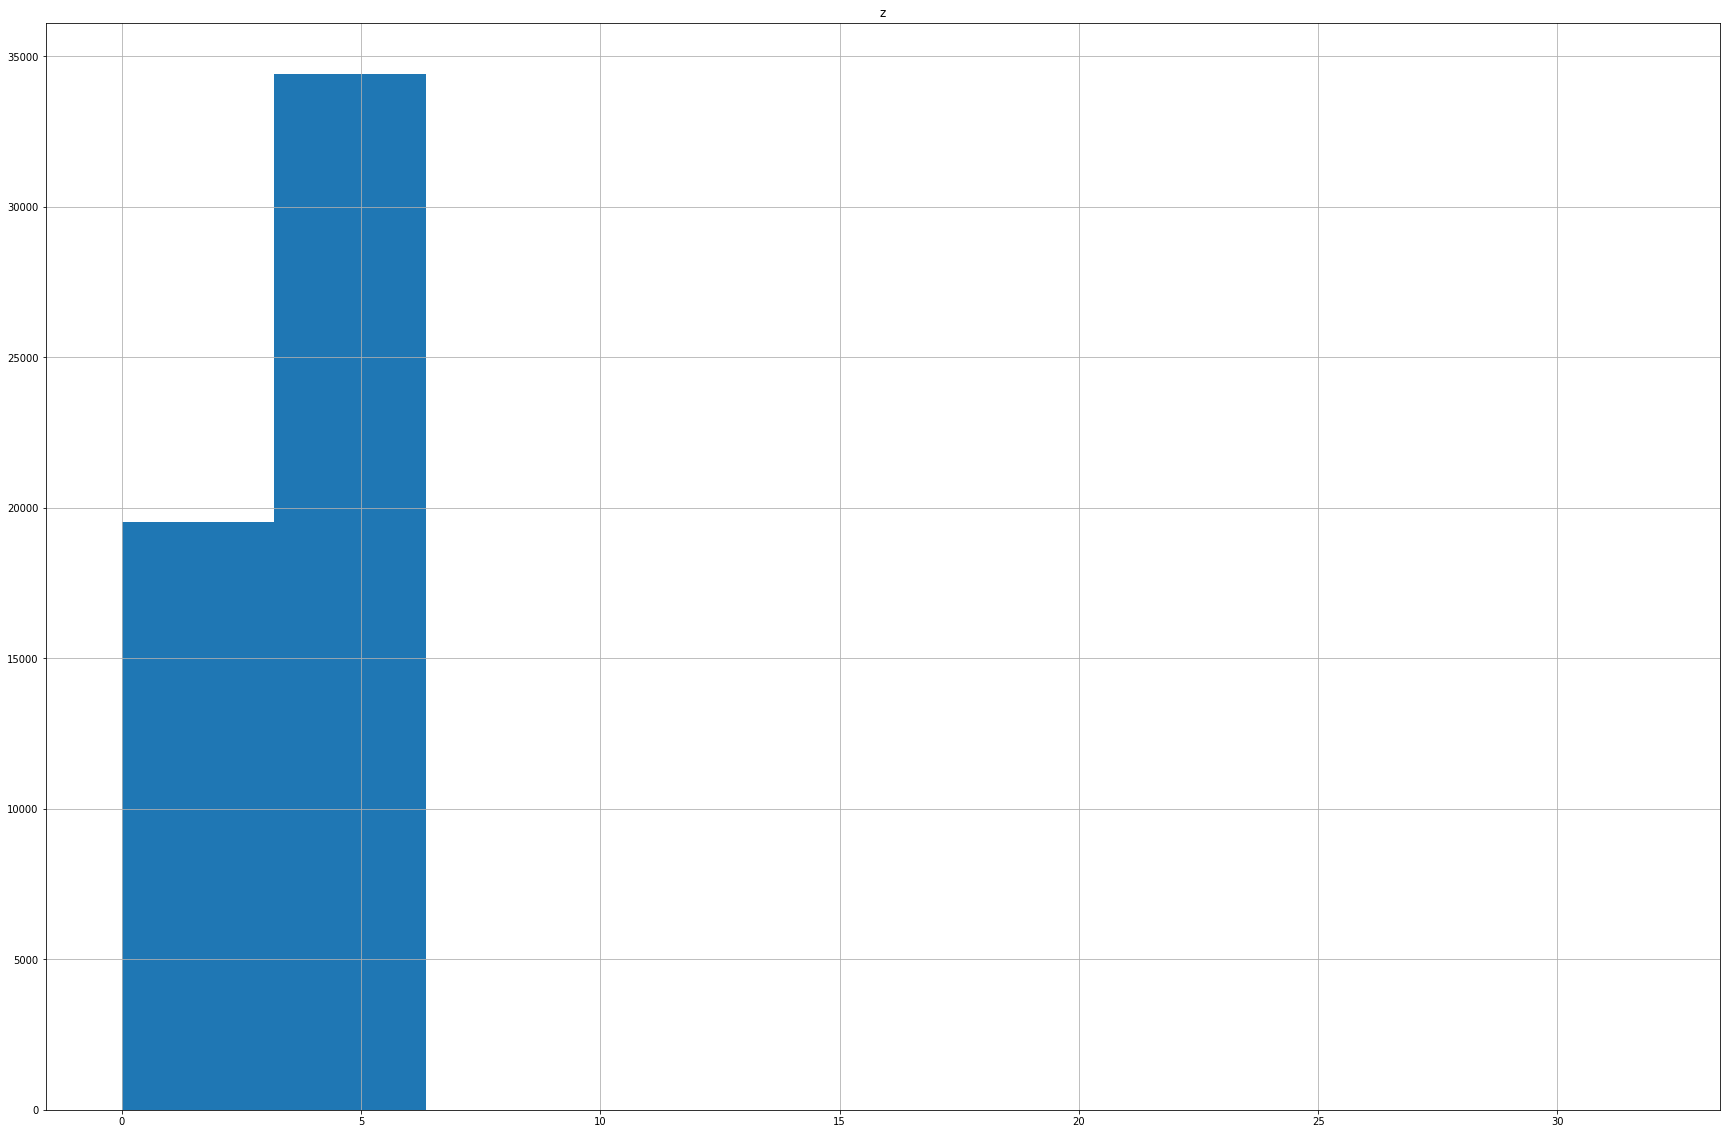

In [17]:
EDA_num(df, NUMcols)

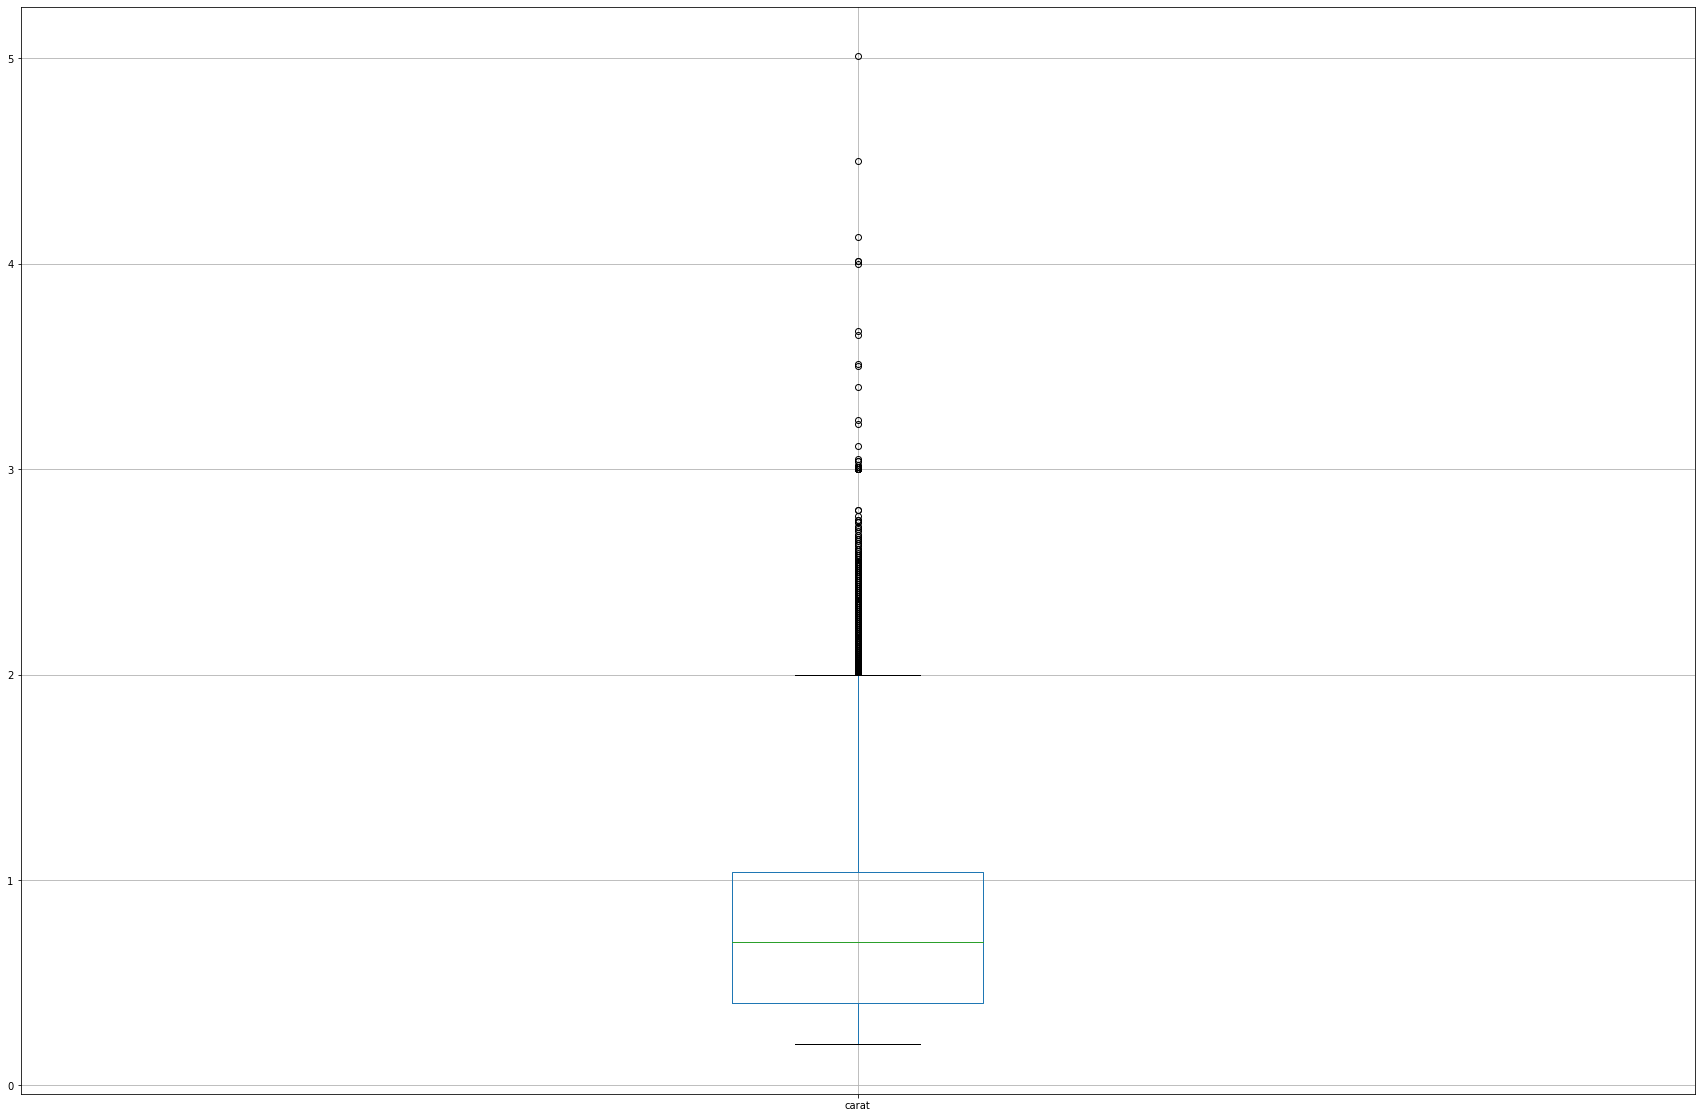

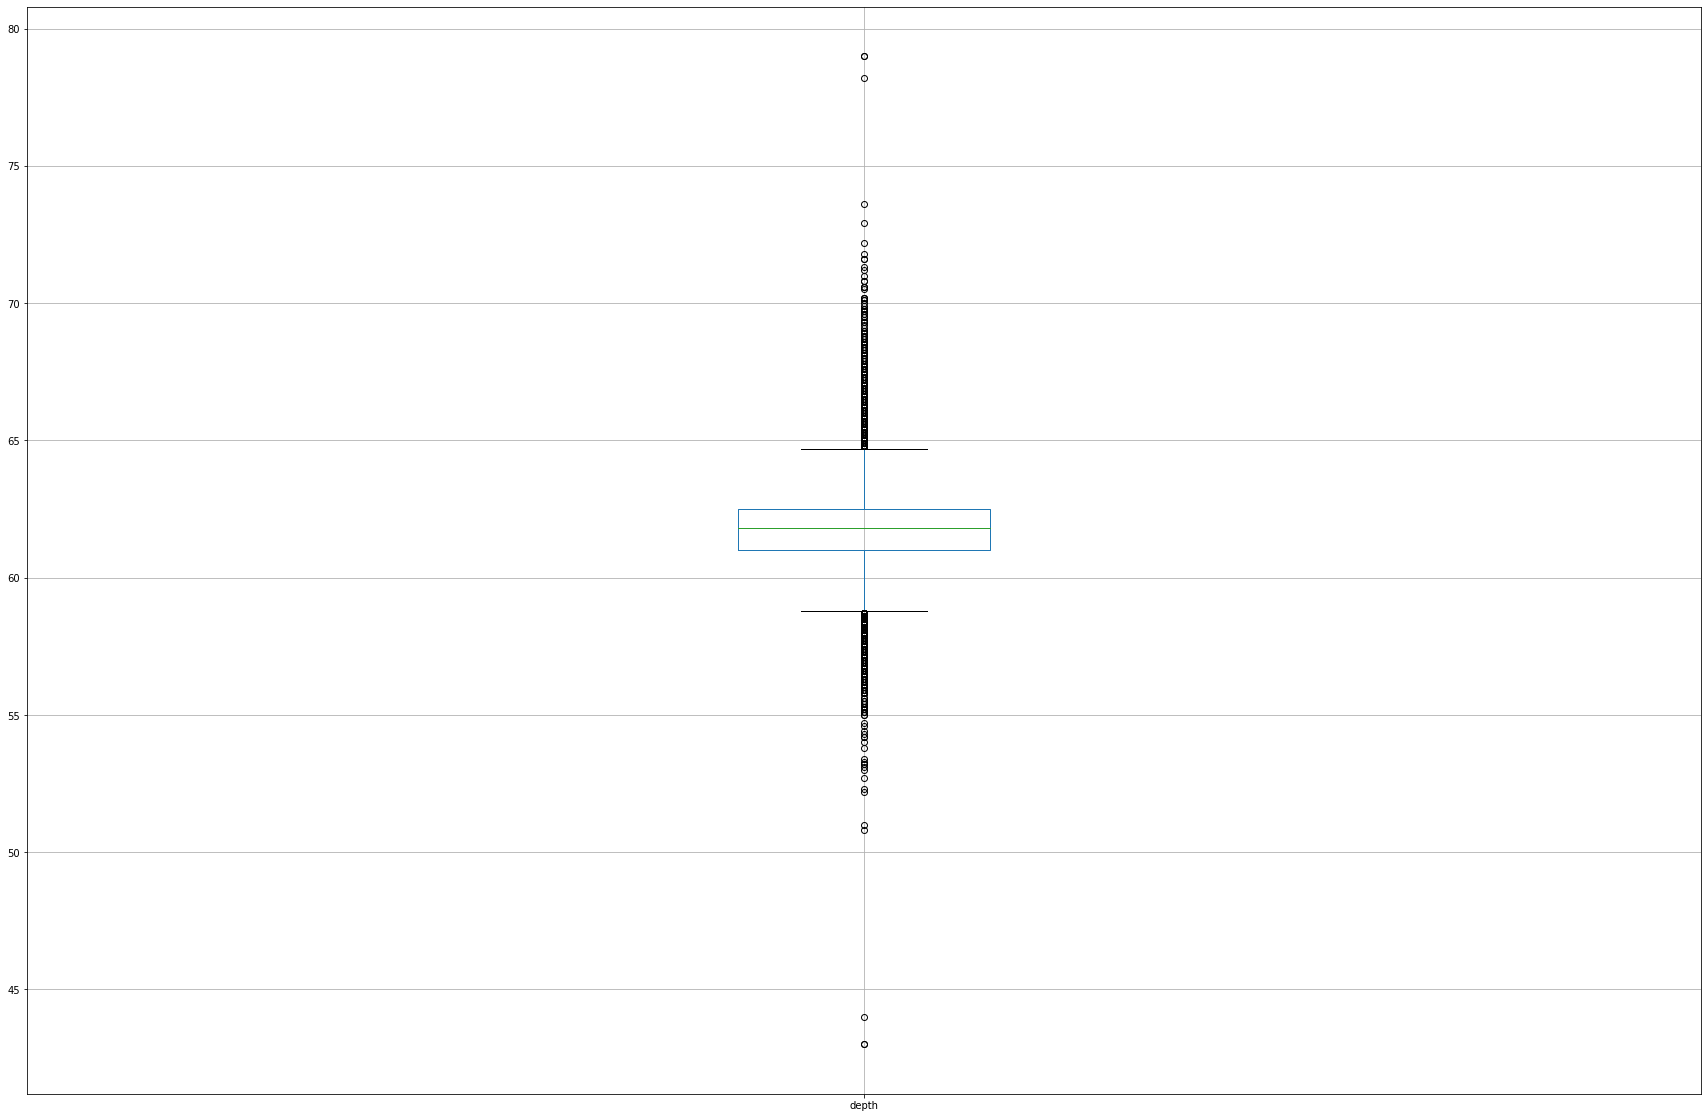

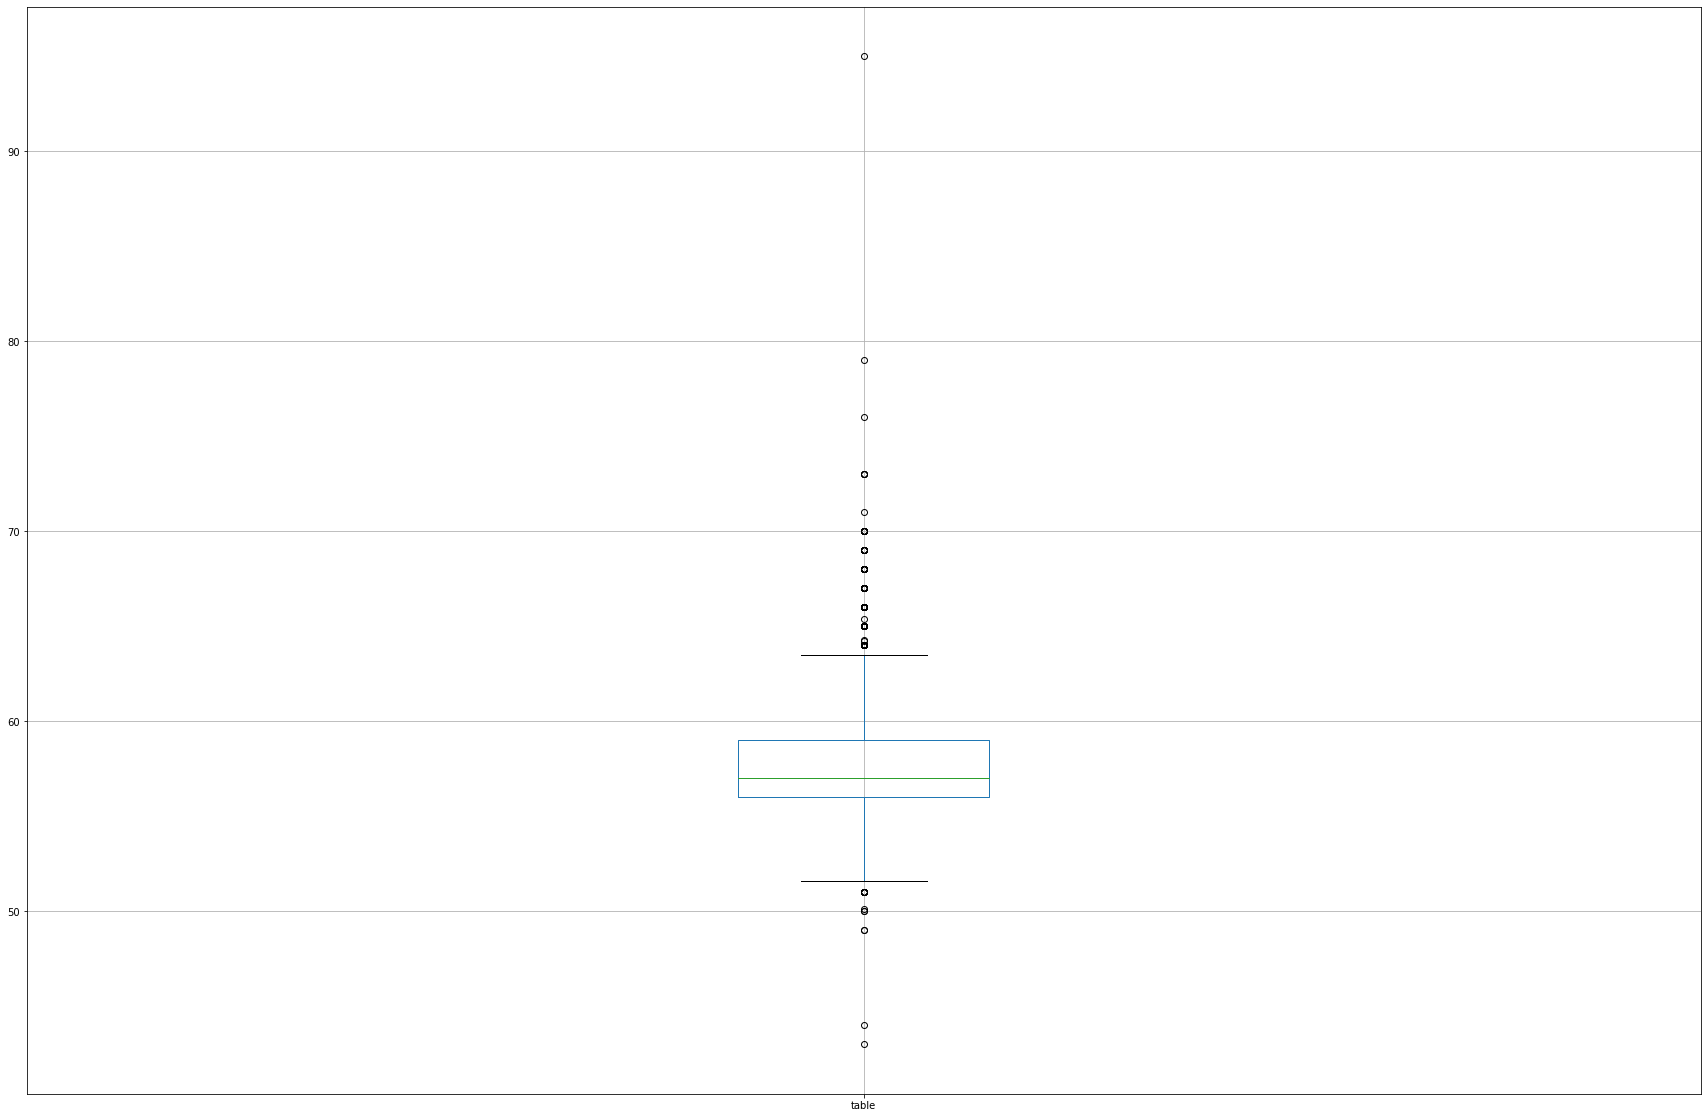

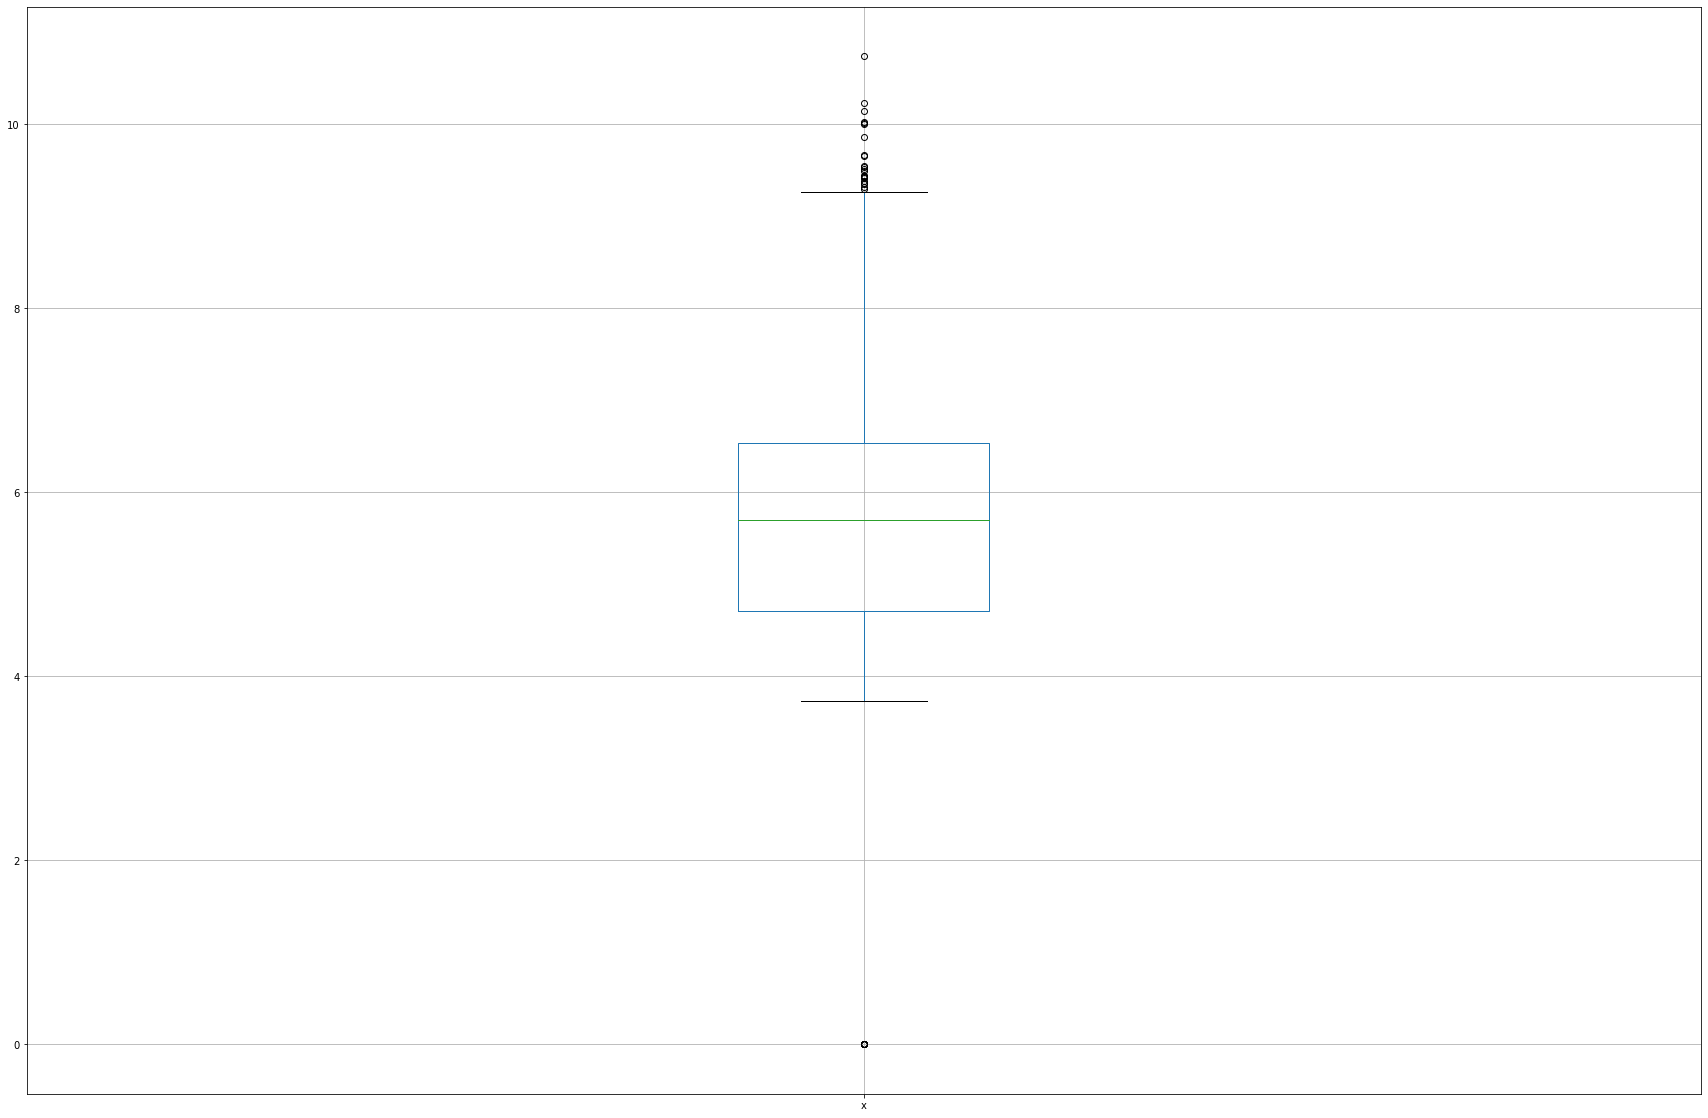

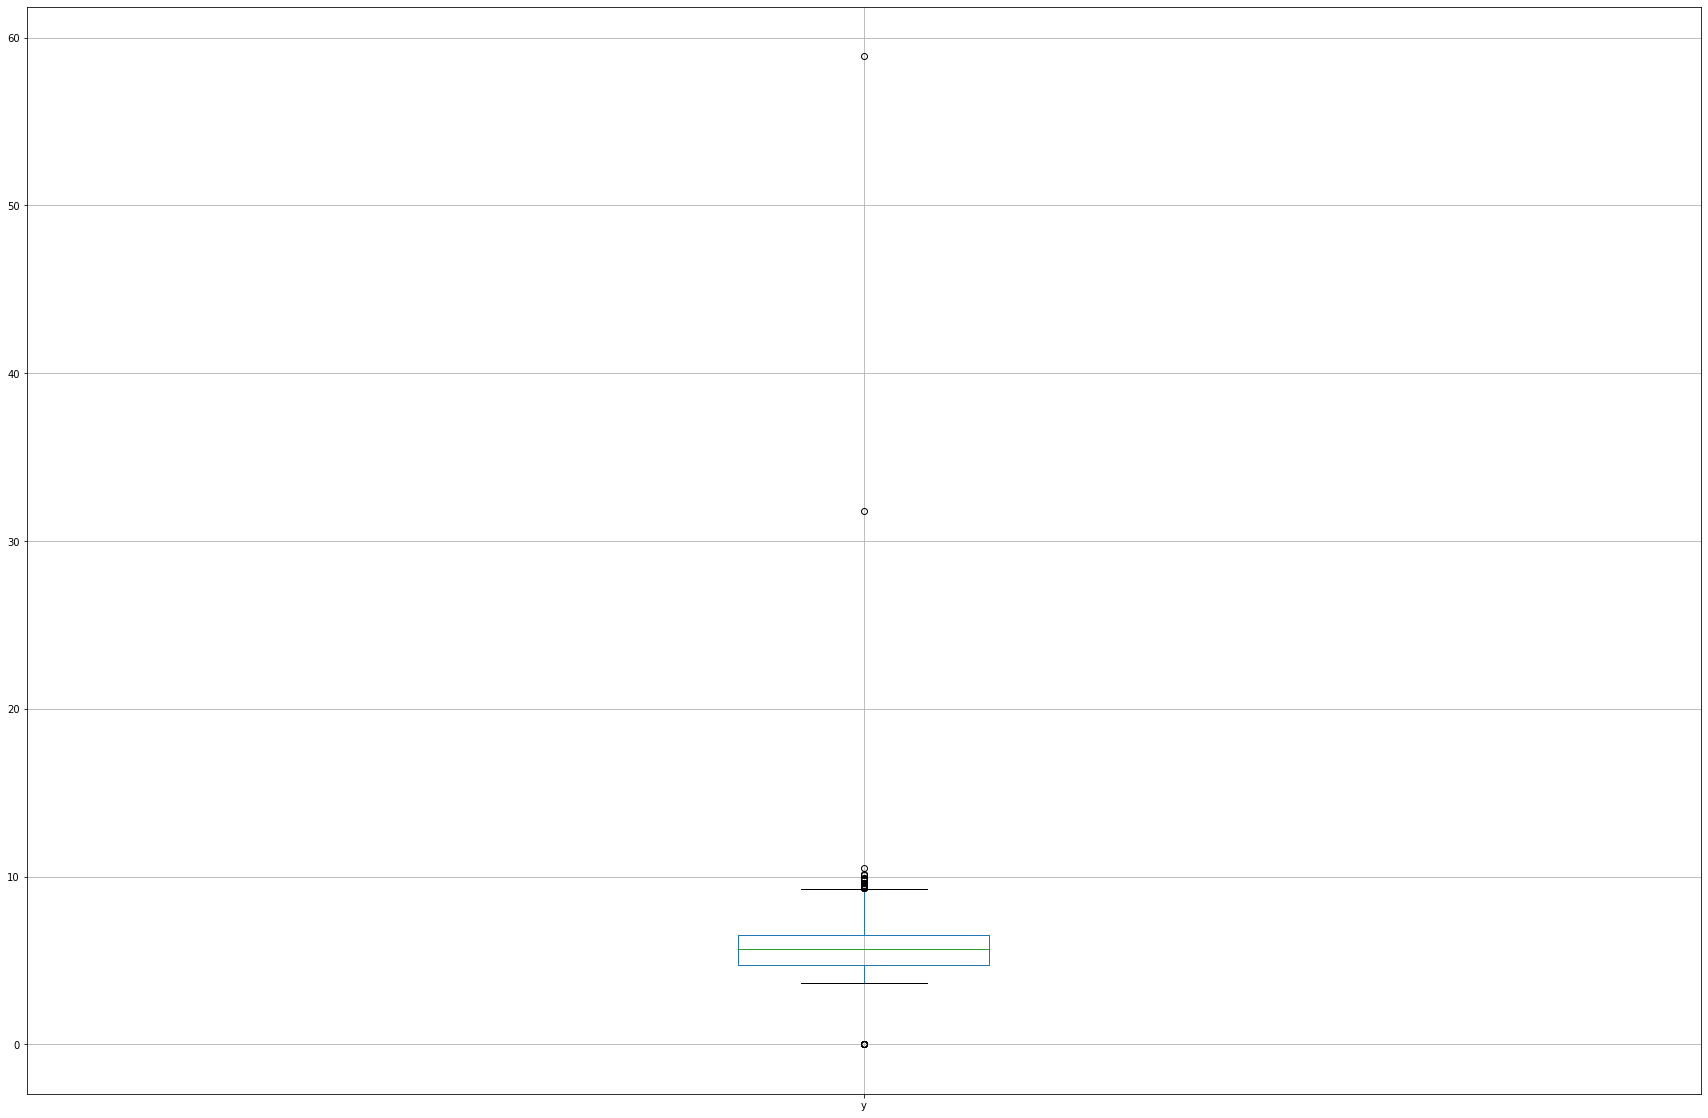

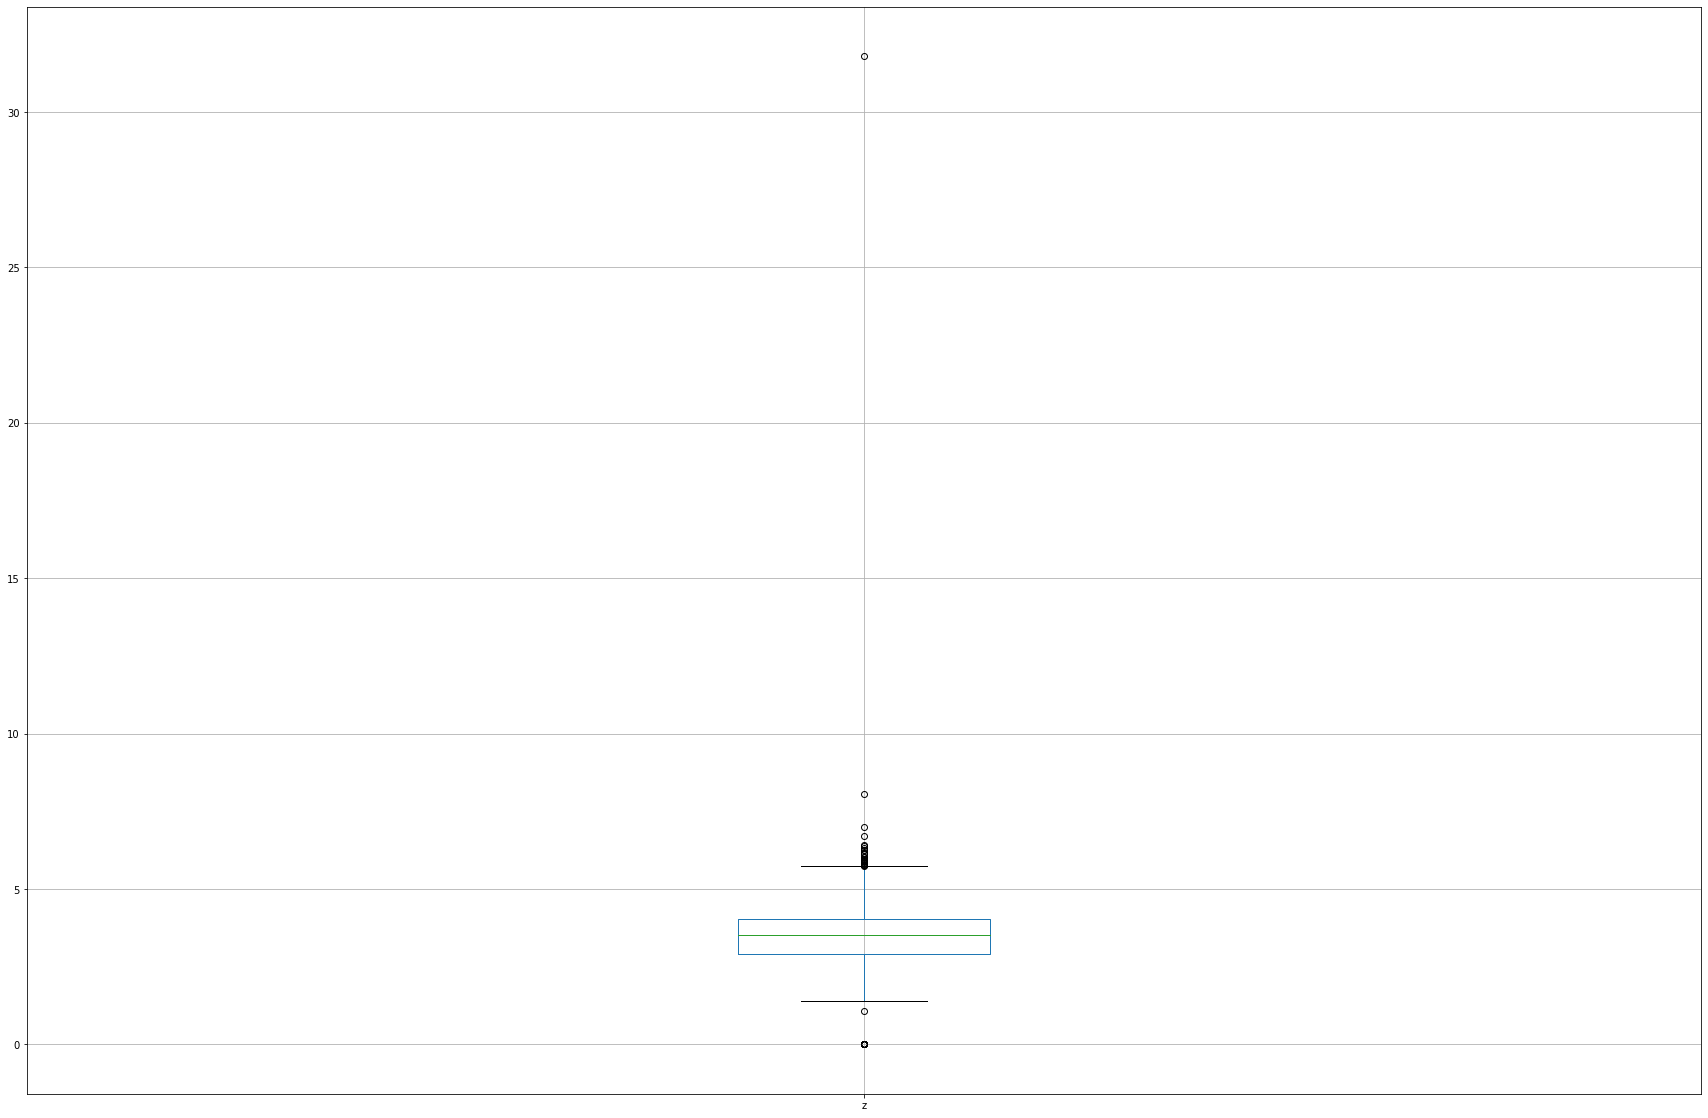

In [18]:
EDA_num_2(df, NUMcols)

# Data Transformation

In [19]:
if DT == 'StandardScaler' : 
    # StandardScaler
    df = NumStandardScaler(df)


Standardization Applied On: carat

Standardization Applied On: depth

Standardization Applied On: table

Standardization Applied On: price

Standardization Applied On: x

Standardization Applied On: y

Standardization Applied On: z


In [20]:
pd.DataFrame(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198,Ideal,E,SI2,-0.174,-1.100,-0.904,-1.588,-1.536,-1.571
1,-1.240,Premium,E,SI1,-1.361,1.586,-0.904,-1.641,-1.659,-1.741
2,-1.198,Good,E,VS1,-3.385,3.376,-0.904,-1.499,-1.457,-1.741
3,-1.072,Premium,I,VS2,0.454,0.243,-0.902,-1.365,-1.317,-1.288
4,-1.029,Good,J,SI2,1.082,0.243,-0.902,-1.240,-1.212,-1.118


# Feature Engineering 

In [21]:
if FE == 'OneHotEncoding':
    df = ObjOneHotEncoder(df, Objcols)
    df = df.apply(lambda x: AllObjLabelEncoder(x))


One Hote Encodeing Applied On: Index(['cut', 'color', 'clarity'], dtype='object')


In [22]:
pd.DataFrame(df.head())

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198,-0.174,-1.100,-0.904,-1.588,-1.536,-1.571,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
1,-1.240,-1.361,1.586,-0.904,-1.641,-1.659,-1.741,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
2,-1.198,-3.385,3.376,-0.904,-1.499,-1.457,-1.741,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3,-1.072,0.454,0.243,-0.902,-1.365,-1.317,-1.288,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,-1.029,1.082,0.243,-0.902,-1.240,-1.212,-1.118,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


# Feature Selection

In [23]:
fs = None

if FS == 'Forward':
    df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

All the obj Variables: []


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  1.6min finished

[2022-07-20 05:47:18] Features: 1/26 -- score: -0.12726833102815557[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.7min finished

[2022-07-20 05:52:02] Features: 2/26 -- score: -0.10937683749722604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  5.0min finished

[2022-07-20 05:57:02] Features: 3/26 -- score: -0.09432029649190457[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 


Most Variables Can Effect The Target Variables:  ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2']

With Highest Score:  -0.01962060720926747

All the Variables Selected:  ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS2', 'price']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished

[2022-07-20 08:39:58] Features: 26/26 -- score: -0.019734795578534487

In [24]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[-0.12540855632199013, -0.13223697417235425, -0.12699010206617395, -0.12445492605704402, -0.12725109652321548]",-0.127,"(y,)",0.003,0.003,0.001
2,"(4, 21)","[-0.10683043242218361, -0.11487857061971428, -0.11027695815241555, -0.10721641058447887, -0.10768181570733797]",-0.109,"(y, clarity_SI2)",0.004,0.003,0.002
3,"(4, 18, 21)","[-0.09265970210217865, -0.09909003971850208, -0.09305629606606729, -0.09416758935003561, -0.09262785522273921]",-0.094,"(y, clarity_I1, clarity_SI2)",0.003,0.002,0.001
4,"(4, 17, 18, 21)","[-0.08034412518907717, -0.08254115461250071, -0.07850278301778212, -0.08140111308119677, -0.07910771570954933]",-0.080,"(y, color_J, clarity_I1, clarity_SI2)",0.002,0.001,0.001
5,"(4, 17, 18, 20, 21)","[-0.06748382816645782, -0.06928114119440368, -0.06473199341628551, -0.06674888505779371, -0.06430422214120121]",-0.067,"(y, color_J, clarity_I1, clarity_SI1, clarity_SI2)",0.002,0.002,0.001
6,"(4, 16, 17, 18, 20, 21)","[-0.056369062045543594, -0.0581361627637515, -0.054569780883044615, -0.05433606002002845, -0.05141108020352267]",-0.055,"(y, color_I, color_J, clarity_I1, clarity_SI1, clarity_SI2)",0.003,0.002,0.001
7,"(4, 15, 16, 17, 18, 20, 21)","[-0.047090651546704304, -0.04991648125253624, -0.04611769790358518, -0.04542098274249744, -0.04293791742904859]",-0.046,"(y, color_H, color_I, color_J, clarity_I1, clarity_SI1, clarity_SI2)",0.003,0.002,0.001
8,"(4, 15, 16, 17, 18, 20, 21, 23)","[-0.04320715401455492, -0.04408038394926085, -0.04130509705703431, -0.04089671658048787, -0.03874217700928703]",-0.042,"(y, color_H, color_I, color_J, clarity_I1, clarity_SI1, clarity_SI2, clarity_VS2)",0.002,0.002,0.001
9,"(4, 15, 16, 17, 18, 20, 21, 22, 23)","[-0.03977086555207401, -0.04145777594332014, -0.03792896076519044, -0.03745214564981048, -0.03575626972549396]",-0.038,"(y, color_H, color_I, color_J, clarity_I1, clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2)",0.003,0.002,0.001
10,"(0, 4, 15, 16, 17, 18, 20, 21, 22, 23)","[-0.03228040024766944, -0.03782377467805165, -0.033371829149944965, -0.03502785249376892, -0.03381131442641801]",-0.034,"(carat, y, color_H, color_I, color_J, clarity_I1, clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2)",0.002,0.002,0.001


In [25]:
pd.DataFrame(df.head())

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,price
0,-1.198,-0.174,-1.100,-1.588,-1.536,-1.571,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,-0.904
1,-1.240,-1.361,1.586,-1.641,-1.659,-1.741,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,-0.904
2,-1.198,-3.385,3.376,-1.499,-1.457,-1.741,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-0.904
3,-1.072,0.454,0.243,-1.365,-1.317,-1.288,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.902
4,-1.029,1.082,0.243,-1.240,-1.212,-1.118,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,-0.902


# Statistics Analytics

## Correlation between Independent Dependent Variables and Dependent Variables

In [26]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,price
0,price,1.000
1,carat,0.922
2,x,0.884
3,y,0.865
4,z,0.861
5,clarity_SI2,0.128
6,table,0.127
7,color_I,0.097
8,color_J,0.082
9,color_H,0.059


## Correlation between all the Variables

In [27]:
pd.DataFrame(df.corr())

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,price
carat,1.000,0.028,0.182,0.975,0.952,0.953,0.034,-0.164,-0.112,-0.139,-0.060,-0.029,0.102,0.161,0.180,0.121,-0.114,0.063,0.267,-0.063,-0.039,-0.137,0.922
depth,0.028,1.000,-0.296,-0.025,-0.029,0.095,0.136,-0.023,-0.014,-0.029,-0.018,0.003,0.026,0.023,0.023,0.081,-0.031,0.041,0.007,-0.024,-0.009,-0.019,-0.011
table,0.182,-0.296,1.000,0.195,0.184,0.151,0.175,-0.550,-0.009,0.007,-0.005,-0.039,0.012,0.018,0.037,0.045,-0.079,0.052,0.095,-0.027,-0.010,-0.062,0.127
x,0.975,-0.025,0.195,1.000,0.975,0.971,0.030,-0.163,-0.106,-0.134,-0.048,-0.025,0.096,0.147,0.165,0.108,-0.126,0.079,0.271,-0.060,-0.036,-0.147,0.884
y,0.952,-0.029,0.184,0.975,1.000,0.952,0.032,-0.153,-0.104,-0.130,-0.047,-0.024,0.093,0.143,0.161,0.101,-0.121,0.076,0.263,-0.056,-0.036,-0.142,0.865
z,0.953,0.095,0.151,0.971,0.952,1.000,0.045,-0.159,-0.105,-0.132,-0.049,-0.025,0.095,0.145,0.164,0.112,-0.125,0.081,0.263,-0.059,-0.036,-0.145,0.861
cut_Good,0.034,0.136,0.175,0.030,0.032,0.045,1.000,-0.258,0.009,0.007,0.007,-0.025,-0.010,0.006,0.015,0.016,-0.033,0.056,0.042,-0.017,-0.021,-0.039,-0.000
cut_Ideal,-0.164,-0.023,-0.550,-0.163,-0.153,-0.159,-0.258,1.000,0.015,-0.001,0.001,0.035,-0.021,-0.009,-0.038,-0.049,0.105,-0.083,-0.108,0.034,0.016,0.076,-0.097
color_D,-0.112,-0.014,-0.009,-0.106,-0.104,-0.105,0.009,0.015,1.000,-0.179,-0.176,-0.195,-0.162,-0.127,-0.089,-0.025,-0.047,0.058,0.032,-0.050,0.021,-0.016,-0.072
color_E,-0.139,-0.029,0.007,-0.134,-0.130,-0.132,0.007,-0.001,-0.179,1.000,-0.218,-0.242,-0.201,-0.157,-0.110,-0.013,-0.045,0.006,0.006,-0.027,0.028,0.012,-0.101


In [28]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.034196,-0.163660,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.137024,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,0.136114,-0.022778,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.019243,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.175174,-0.549599,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.062273,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.030349,-0.162674,-0.106127,-0.134213,-0.048021,-0.024593,0.095896,0.146522,0.164658,0.108361,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.147151,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.032187,-0.153158,-0.103999,-0.130136,-0.046707,-0.024479,0.093480,0.142895,0.160776,0.100736,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.141624,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.045169,-0.158688,-0.105216,-0.132210,-0.048803,-0.024582,0.095041,0.145276,0.164217,0.111913,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.144746,0.861249
cut_Good,0.034196,0.136114,0.175174,0.030349,0.032187,0.045169,1.000000,-0.258018,0.008909,0.007013,0.006949,-0.024729,-0.009517,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.038627,-0.000312
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.162674,-0.153158,-0.158688,-0.258018,1.000000,0.014521,-0.001105,0.001351,0.034649,-0.021264,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.075508,-0.097175
color_D,-0.112057,-0.013566,-0.008921,-0.106127,-0.103999,-0.105216,0.008909,0.014521,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,-0.126699,-0.088817,-0.024545,-0.047418,0.057715,0.032017,-0.050134,0.021007,-0.015975,-0.072473
color_E,-0.139215,-0.028713,0.007172,-0.134213,-0.130136,-0.132210,0.007013,-0.001105,-0.178550,1.000000,-0.218401,-0.242411,-0.200958,-0.157487,-0.110400,-0.013462,-0.044863,0.005953,0.005514,-0.027238,0.027954,0.011683,-0.101089


# Data Splitting 

In [29]:
X = df.drop(target, axis=1)
y = df[target]

if Random == 'Enable': 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Split_size, random_state=Randon_state_size)

print('X_train Rows size: ', X_train.shape[0])
print('X_train Columns size: ', X_train.shape[1])
print('\ny_train Rows size: ', y_train.shape[0])
print('\nX_test Rows size: ', X_test.shape[0])
print('X_test Columns size: ', X_test.shape[1])
print('\ny_test Rows size: ', y_test.shape[0])

X_train Rows size:  43152
X_train Columns size:  22

y_train Rows size:  43152

X_test Rows size:  10788
X_test Columns size:  22

y_test Rows size:  10788


# Machine Learning Models 

## Build the Machine Learning Models on 

In [30]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST = RandomForestRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nRandom Forest Regressor model trained')

    # Gradient Boosting Regressor
    gb_ST = GradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nGradient Boosting Regressor model trained')

    # Histogram-based Gradient Boosting Regression
    hgb_ST = HistGradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nHistogram-based Gradient Boosting Regression model trained')

    # AdaBoost Regressor
    ad_ST = AdaBoostRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nAdaBoost Regressor model trained')

    # Extra Trees Regressor
    et_ST = ExtraTreesRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nExtra Trees Regressor model trained')

    # K Neighbors Regressor
    knn_ST = KNeighborsRegressor().fit(X_train, y_train)
    print ('\nK Neighbors Regressor model trained')

    # Decision Tree Regressor
    dt_ST = DecisionTreeRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nDecision Tree Regressor model trained')

    # XGBoost Regressors
    xgb_ST = XGBRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nXGBoost Regressors model trained')

    # Support Vector Machines Regressors
    svm_ST = SVR().fit(X_train, y_train)
    print ('\nSupport Vector Machines Regressors model trained')

    # Linear Support Vector Regression
    lsvm_ST = LinearSVR(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nLinear Support Vector Regression model trained')

    # Multilayer Perceptron Regressor
    mlp_ST = MLPRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nMultilayer Perceptron Regressor model trained')


Random Forest Regressor model trained

Gradient Boosting Regressor model trained

Histogram-based Gradient Boosting Regression model trained

AdaBoost Regressor model trained

Extra Trees Regressor model trained

K Neighbors Regressor model trained

Decision Tree Regressor model trained
[08:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost Regressors model trained

Support Vector Machines Regressors model trained

Linear Support Vector Regression model trained

Multilayer Perceptron Regressor model trained


## Predict y_test Using Machine Learning  Models

In [31]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST_pred = rf_ST.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model')

    # Gradient Boosting Regressor
    gb_ST_pred = gb_ST.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

    # Histogram-based Gradient Boosting Regression Tree
    hgb_ST_pred = hgb_ST.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

    # AdaBoost Regressor
    ad_ST_pred = ad_ST.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

    # Extra Trees Regressor
    et_ST_pred = et_ST.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

    # K Neighbors Regressor
    knn_ST_pred = knn_ST.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

    # Decision Tree Regressor
    dt_ST_pred = dt_ST.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

    # XGBoost Regressors
    xgb_ST_pred = xgb_ST.predict(X_test)
    print ('\nPredict y_test using XGBoost Regressors model done')

    # Support Vector Machines Regressors
    svm_ST_pred = svm_ST.predict(X_test)
    print ('\nPredict y_test using Support Vector Machines Regressors model done')

    # Linear Support Vector Regression
    lsvm_ST_pred = lsvm_ST.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regression model done')

    # Multilayer Perceptron Regressor
    mlp_ST_pred = mlp_ST.predict(X_test)
    print ('\nPredict y_test using Multilayer Perceptron Regressor model done')


Predict y_test using Random Forest Regressor model

Predict y_test using Gradient Boosting Regressor model done

Predict y_test using Histogram-based Gradient Boosting Regression model done

Predict y_test using AdaBoost Regressor model done

Predict y_test using Extra Trees Regressor model done

Predict y_test using K Neighbors Regressor model done

Predict y_test using Decision Tree Regressor model done

Predict y_test using XGBoost Regressors model done

Predict y_test using Support Vector Machines Regressors model done

Predict y_test using Linear Support Vector Regression model done

Predict y_test using Multilayer Perceptron Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [32]:
if ML_ST == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_ST = mean_absolute_error(y_test, rf_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_ST = explained_variance_score(y_test, rf_ST_pred)

    # Max Error
    max_error_rf_ST = max_error(y_test, rf_ST_pred)

    # Median Absolute Error
    median_absolute_error_rf_ST = median_absolute_error(y_test, rf_ST_pred)

    # R^2
    r2_score_rf_ST = r2_score(y_test, rf_ST_pred)

    _rf_ST_valid_compare = pd.DataFrame({"Random Forest Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_ST, 
                                                mean_squared_error_rf_ST,
                                                Root_mean_squared_error_rf_ST,
                                                explained_variance_score_rf_ST,
                                                max_error_rf_ST,
                                                median_absolute_error_rf_ST,
                                                r2_score_rf_ST,
                                                ],
                                        })  
    print(tabulate(_rf_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Random Forest Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |  0.0677321 |
|  1 | Mean Squared Error (MSE)                   |  0.0188631 |
|  2 | Root Mean Squared Error (RMSE)             |  0.137343  |
|  3 | Explained Variance Score                   |  0.981125  |
|  4 | Max Error                                  |  1.58567   |
|  5 | Median Absolute Error                      |  0.024436  |
|  6 | R^2                                        |  0.981115  |
+----+--------------------------------------------+------------+


### Gradient Boosting Regressor

In [33]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_ST = mean_absolute_error(y_test, gb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_ST = explained_variance_score(y_test, gb_ST_pred)

    # Max Error
    max_error_gb_ST = max_error(y_test, gb_ST_pred)

    # Median Absolute Error
    median_absolute_error_gb_ST = median_absolute_error(y_test, gb_ST_pred)

    # R^2
    r2_score_gb_ST = r2_score(y_test, gb_ST_pred)

    _gb_ST_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_ST, 
                                                mean_squared_error_gb_ST,
                                                Root_mean_squared_error_gb_ST,
                                                explained_variance_score_gb_ST,
                                                max_error_gb_ST,
                                                median_absolute_error_gb_ST,
                                                r2_score_gb_ST,
                                                ],
                                        })  
    print(tabulate(_gb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |  0.103245  |
|  1 | Mean Squared Error (MSE)                       |  0.0351389 |
|  2 | Root Mean Squared Error (RMSE)                 |  0.187454  |
|  3 | Explained Variance Score                       |  0.964827  |
|  4 | Max Error                                      |  1.65586   |
|  5 | Median Absolute Error                          |  0.0490328 |
|  6 | R^2                                            |  0.96482   |
+----+------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [34]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_ST = mean_absolute_error(y_test, hgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_ST = explained_variance_score(y_test, hgb_ST_pred)

    # Max Error
    max_error_hgb_ST = max_error(y_test, hgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_hgb_ST = median_absolute_error(y_test, hgb_ST_pred)

    # R^2
    r2_score_hgb_ST = r2_score(y_test, hgb_ST_pred)

    _hgb_ST_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_ST, 
                                                mean_squared_error_hgb_ST,
                                                Root_mean_squared_error_hgb_ST,
                                                explained_variance_score_hgb_ST,
                                                max_error_hgb_ST,
                                                median_absolute_error_hgb_ST,
                                                r2_score_hgb_ST,
                                                ],
                                        })  
    print(tabulate(_hgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                      |  0.0725568 |
|  1 | Mean Squared Error (MSE)                                       |  0.0190612 |
|  2 | Root Mean Squared Error (RMSE)                                 |  0.138062  |
|  3 | Explained Variance Score                                       |  0.980917  |
|  4 | Max Error                                                      |  1.49938   |
|  5 | Median Absolute Error                                          |  0.0323625 |
|  6 | R^2                                                            |  0.980917  |
+----+----------------------------------------------------------------+------------+


### AdaBoost Regressor

In [35]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_ST = mean_absolute_error(y_test, ad_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_ST = explained_variance_score(y_test, ad_ST_pred)

    # Max Error
    max_error_ad_ST = max_error(y_test, ad_ST_pred)

    # Median Absolute Error
    median_absolute_error_ad_ST = median_absolute_error(y_test, ad_ST_pred)

    # R^2
    r2_score_ad_ST = r2_score(y_test, ad_ST_pred)

    _ad_ST_valid_compare = pd.DataFrame({"AdaBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_ST, 
                                                mean_squared_error_ad_ST,
                                                Root_mean_squared_error_ad_ST,
                                                explained_variance_score_ad_ST,
                                                max_error_ad_ST,
                                                median_absolute_error_ad_ST,
                                                r2_score_ad_ST,
                                                ],
                                        })  
    print(tabulate(_ad_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------+------------+
|    | AdaBoost Regressor Standered Models   |   Accuracy |
|----+---------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)             |   0.276649 |
|  1 | Mean Squared Error (MSE)              |   0.136362 |
|  2 | Root Mean Squared Error (RMSE)        |   0.369273 |
|  3 | Explained Variance Score              |   0.903525 |
|  4 | Max Error                             |   1.78362  |
|  5 | Median Absolute Error                 |   0.185543 |
|  6 | R^2                                   |   0.863479 |
+----+---------------------------------------+------------+


### Extra Trees Regressor

In [36]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_ST = mean_absolute_error(y_test, et_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_ST = explained_variance_score(y_test, et_ST_pred)

    # Max Error
    max_error_et_ST = max_error(y_test, et_ST_pred)

    # Median Absolute Error
    median_absolute_error_et_ST = median_absolute_error(y_test, et_ST_pred)

    # R^2
    r2_score_et_ST = r2_score(y_test, et_ST_pred)

    _et_ST_valid_compare = pd.DataFrame({"Extra Trees Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_ST, 
                                                mean_squared_error_et_ST,
                                                Root_mean_squared_error_et_ST,
                                                explained_variance_score_et_ST,
                                                max_error_et_ST,
                                                median_absolute_error_et_ST,
                                                r2_score_et_ST,
                                                ],
                                        })  
    print(tabulate(_et_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | Extra Trees Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |  0.0669588 |
|  1 | Mean Squared Error (MSE)                 |  0.0191493 |
|  2 | Root Mean Squared Error (RMSE)           |  0.138381  |
|  3 | Explained Variance Score                 |  0.980835  |
|  4 | Max Error                                |  1.59907   |
|  5 | Median Absolute Error                    |  0.023793  |
|  6 | R^2                                      |  0.980828  |
+----+------------------------------------------+------------+


### K Neighbors Regressor

In [37]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_ST = mean_absolute_error(y_test, knn_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_ST = explained_variance_score(y_test, knn_ST_pred)

    # Max Error
    max_error_knn_ST = max_error(y_test, knn_ST_pred)

    # Median Absolute Error
    median_absolute_error_knn_ST = median_absolute_error(y_test, knn_ST_pred)

    # R^2
    r2_score_knn_ST = r2_score(y_test, knn_ST_pred)

    _knn_ST_valid_compare = pd.DataFrame({"K Neighbors Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_ST, 
                                                mean_squared_error_knn_ST,
                                                Root_mean_squared_error_knn_ST,
                                                explained_variance_score_knn_ST,
                                                max_error_knn_ST,
                                                median_absolute_error_knn_ST,
                                                r2_score_knn_ST,
                                                ],
                                        })  
    print(tabulate(_knn_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | K Neighbors Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |  0.0940125 |
|  1 | Mean Squared Error (MSE)                 |  0.032445  |
|  2 | Root Mean Squared Error (RMSE)           |  0.180125  |
|  3 | Explained Variance Score                 |  0.96752   |
|  4 | Max Error                                |  3.03815   |
|  5 | Median Absolute Error                    |  0.0383015 |
|  6 | R^2                                      |  0.967517  |
+----+------------------------------------------+------------+


### Decision Tree Regressor

In [38]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_ST = mean_absolute_error(y_test, dt_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_ST = explained_variance_score(y_test, dt_ST_pred)

    # Max Error
    max_error_dt_ST = max_error(y_test, dt_ST_pred)

    # Median Absolute Error
    median_absolute_error_dt_ST = median_absolute_error(y_test, dt_ST_pred)

    # R^2
    r2_score_dt_ST = r2_score(y_test, dt_ST_pred)

    _dt_ST_valid_compare = pd.DataFrame({"Decision Tree Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_ST, 
                                                mean_squared_error_dt_ST,
                                                Root_mean_squared_error_dt_ST,
                                                explained_variance_score_dt_ST,
                                                max_error_dt_ST,
                                                median_absolute_error_dt_ST,
                                                r2_score_dt_ST,
                                                ],
                                        })  
    print(tabulate(_dt_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Decision Tree Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |  0.0897281 |
|  1 | Mean Squared Error (MSE)                   |  0.0346395 |
|  2 | Root Mean Squared Error (RMSE)             |  0.186117  |
|  3 | Explained Variance Score                   |  0.965331  |
|  4 | Max Error                                  |  1.78097   |
|  5 | Median Absolute Error                      |  0.0315837 |
|  6 | R^2                                        |  0.96532   |
+----+--------------------------------------------+------------+


### XGBoost Regressor

In [39]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_xgb_ST = mean_absolute_error(y_test, xgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_xgb_ST = explained_variance_score(y_test, xgb_ST_pred)

    # Max Error
    max_error_xgb_ST = max_error(y_test, xgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_xgb_ST = median_absolute_error(y_test, xgb_ST_pred)

    # R^2
    r2_score_xgb_ST = r2_score(y_test, xgb_ST_pred)

    _xgb_ST_valid_compare = pd.DataFrame({"XGBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_xgb_ST, 
                                                mean_squared_error_xgb_ST,
                                                Root_mean_squared_error_xgb_ST,
                                                explained_variance_score_xgb_ST,
                                                max_error_xgb_ST,
                                                median_absolute_error_xgb_ST,
                                                r2_score_xgb_ST,
                                                ],
                                        })  
    print(tabulate(_xgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+------------+
|    | XGBoost Regressor Standered Models   |   Accuracy |
|----+--------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)            |  0.104077  |
|  1 | Mean Squared Error (MSE)             |  0.0359216 |
|  2 | Root Mean Squared Error (RMSE)       |  0.18953   |
|  3 | Explained Variance Score             |  0.964045  |
|  4 | Max Error                            |  1.6245    |
|  5 | Median Absolute Error                |  0.0493208 |
|  6 | R^2                                  |  0.964037  |
+----+--------------------------------------+------------+


### Support Vector Regressor

In [40]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_ST = mean_absolute_error(y_test, svm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_ST = explained_variance_score(y_test, svm_ST_pred)

    # Max Error
    max_error_svm_ST = max_error(y_test, svm_ST_pred)

    # Median Absolute Error
    median_absolute_error_svm_ST = median_absolute_error(y_test, svm_ST_pred)

    # R^2
    r2_score_svm_ST = r2_score(y_test, svm_ST_pred)

    _svm_ST_valid_compare = pd.DataFrame({"Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_ST, 
                                                mean_squared_error_svm_ST,
                                                Root_mean_squared_error_svm_ST,
                                                explained_variance_score_svm_ST,
                                                max_error_svm_ST,
                                                median_absolute_error_svm_ST,
                                                r2_score_svm_ST,
                                                ],
                                        })  
    print(tabulate(_svm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Support Vector Regressor Standered Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |  0.0834189 |
|  1 | Mean Squared Error (MSE)                    |  0.0211465 |
|  2 | Root Mean Squared Error (RMSE)              |  0.145418  |
|  3 | Explained Variance Score                    |  0.978987  |
|  4 | Max Error                                   |  1.60983   |
|  5 | Median Absolute Error                       |  0.0503589 |
|  6 | R^2                                         |  0.978829  |
+----+---------------------------------------------+------------+


### Linear Support Vector Regressor

In [41]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_ST = mean_absolute_error(y_test, lsvm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_ST = explained_variance_score(y_test, lsvm_ST_pred)

    # Max Error
    max_error_lsvm_ST = max_error(y_test, lsvm_ST_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_ST = median_absolute_error(y_test, lsvm_ST_pred)

    # R^2
    r2_score_lsvm_ST = r2_score(y_test, lsvm_ST_pred)

    _lsvm_ST_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_ST, 
                                                mean_squared_error_lsvm_ST,
                                                Root_mean_squared_error_lsvm_ST,
                                                explained_variance_score_lsvm_ST,
                                                max_error_lsvm_ST,
                                                median_absolute_error_lsvm_ST,
                                                r2_score_lsvm_ST,
                                                ],
                                        })  
    print(tabulate(_lsvm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Linear Support Vector Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |  0.160008  |
|  1 | Mean Squared Error (MSE)                           |  0.0970025 |
|  2 | Root Mean Squared Error (RMSE)                     |  0.311452  |
|  3 | Explained Variance Score                           |  0.904701  |
|  4 | Max Error                                          |  4.54898   |
|  5 | Median Absolute Error                              |  0.0674797 |
|  6 | R^2                                                |  0.902885  |
+----+----------------------------------------------------+------------+


### Multilayer Perceptron Regressor

In [42]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_mlp_ST = mean_absolute_error(y_test, mlp_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_mlp_ST = explained_variance_score(y_test, mlp_ST_pred)

    # Max Error
    max_error_mlp_ST = max_error(y_test, mlp_ST_pred)

    # Median Absolute Error
    median_absolute_error_mlp_ST = median_absolute_error(y_test, mlp_ST_pred)

    # R^2
    r2_score_mlp_ST = r2_score(y_test, mlp_ST_pred)

    _mlp_ST_valid_compare = pd.DataFrame({"Multilayer Perceptron Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_mlp_ST, 
                                                mean_squared_error_mlp_ST,
                                                Root_mean_squared_error_mlp_ST,
                                                explained_variance_score_mlp_ST,
                                                max_error_mlp_ST,
                                                median_absolute_error_mlp_ST,
                                                r2_score_mlp_ST,
                                                ],
                                        })  
    print(tabulate(_mlp_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Multilayer Perceptron Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |  0.0805649 |
|  1 | Mean Squared Error (MSE)                           |  0.0203455 |
|  2 | Root Mean Squared Error (RMSE)                     |  0.142638  |
|  3 | Explained Variance Score                           |  0.979783  |
|  4 | Max Error                                          |  1.65279   |
|  5 | Median Absolute Error                              |  0.0416533 |
|  6 | R^2                                                |  0.979631  |
+----+----------------------------------------------------+------------+


# Machine Learning Models Optimization

##  random grid for  Models

### Random Forest Regressor

In [43]:
if ML_OP == 'Enable':

    n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=100 (The number of trees in the forest)
    criterion = ['squared_error', 'absolute_error', 'poisson'] # {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'log2', 'auto'] # {“sqrt”, “log2”, 'auto' ,None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease = [0.0, 0.2, 0.5, 0.75] # float, default=0.0
    bootstrap = [True, False] # bool, default=True
    oob_score = [False, True] # bool, default=False
    n_jobs = [-1] # int, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    verbose = [0] # int, default=0
    warm_start = [False] # bool, default=False
    ccp_alpha = [0.0] # non-negative float, default=0.0
    max_samples = [None] # int or float, default=None

    # Create the random grid
    random_grid_rf = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features': max_features,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs, 
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start' : warm_start, 
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
                }
                
    for key, value in random_grid_rf.items():
        print(key, ' : ', value)

### Gradient Boosting Regressor

In [44]:
if ML_OP == 'Enable':
    
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.1 (Values must be in the range (0.0, inf))
    n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=100 (Values must be in the range [1, inf))
    subsample = [0.5, 1.0] # float, default=1.0 (Values must be in the range (0.0, 1.0])
    criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse'] # {‘friedman_mse’, ‘squared_error’, ‘mse’}, default=’friedman_mse’
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [2, inf))
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [1, inf))
    min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5] # float, default=0.0 (Values must be in the range [0.0, 0.5])
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=3
    min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.0
    init = [None] # estimator or ‘zero’, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_features = ['sqrt', 'log2', 'auto'] # {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    alpha = [0.9] # float, default=0.9 (Values must be in the range (0.0, 1.0))
    verbose = [0] # int, default=0
    max_leaf_nodes = [None] # int, default=None
    warm_start = [False] # bool, default=False
    validation_fraction = [0.1] # float, default=0.1 (Values must be in the range (0.0, 1.0))
    n_iter_no_change = [None] # int, default=None
    tol = [0.0001] # float, default=1e-4
    ccp_alpha = [0.0] # non-negative float, default=0.0

    # Create the random grid
    random_grid_gb = {'loss': loss,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'subsample': subsample,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf, 
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_depth' : max_depth,
                'min_impurity_decrease' : min_impurity_decrease,
                'init' : init, 
                'random_state' : random_state,
                'max_features' : max_features,
                'alpha' : alpha,
                'verbose' : verbose, 
                'max_leaf_nodes' : max_leaf_nodes,
                'warm_start' : warm_start,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change, 
                'tol' : tol,
                'ccp_alpha' : ccp_alpha
                }
                
    for key, value in random_grid_gb.items():
        print(key, ' : ', value)

### Histogram-based Gradient Boosting Regressor

In [45]:
if ML_OP == 'Enable':
    
    loss= ['squared_error', 'absolute_error', 'poisson', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘poisson’, ‘quantile’}, default=’squared_error’
    quantile = [None] # float, default=None (If loss is “quantile”, this parameter specifies which quantile to be estimated and must be between 0 and 1)
    learning_rate=[0.05, 0.1, 0.2, 0.3, 0.9] # float, default=0.1
    max_iter= [int(x) for x in np.linspace(50, 150, num = 10)] # int, default=100 (the maximum number of trees.)
    max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] # int or None, default=31 (Must be strictly greater than 1. If None, there is no maximum limit.)
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int or None, default=None 
    min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=20
    l2_regularization=[0.0, 0.1, 0.6] # float, default=0
    max_bins=[int(x) for x in np.linspace(100, 255, num = 20)] # int, default=255 (Must be no larger than 255) 

    categorical_features=[None] # array-like of {bool, int} of shape (n_features) or shape (n_categorical_features,), default=None (None : no feature will be considered categorical , boolean array-like : boolean mask indicating categorical features and integer array-like : integer indices indicating categorical features)
    monotonic_cst=[None] # array-like of int of shape (n_features), default=None
    warm_start=[False] # bool, default=False
    early_stopping=['auto'] # ‘auto’ or bool, default=’auto’
    scoring=['loss'] # str or callable or None, default=’loss’
    validation_fraction=[0.1] # int or float or None, default=0.1
    n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=10
    tol=[1e-07] # float, default=1e-7
    verbose=[0] # int, default=0
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_hgb = {'loss' : loss,
                    'learning_rate' : learning_rate,
                    'max_iter' : max_iter,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'max_depth' : max_depth,
                    'min_samples_leaf' : min_samples_leaf,
                    'l2_regularization' : l2_regularization,
                    'max_bins' : max_bins,
                    'categorical_features' : categorical_features,
                    'monotonic_cst' : monotonic_cst,
                    'warm_start' : warm_start,
                    'early_stopping' : early_stopping,
                    'scoring' : scoring,
                    'validation_fraction' : validation_fraction,
                    'n_iter_no_change' : n_iter_no_change,
                    'tol' : tol,
                    'verbose' : verbose,
                    'random_state' : random_state
                        }
                        
    for key, value in random_grid_hgb.items():
        print(key, ' : ', value)

### AdaBoost Regressor

In [46]:
if ML_OP == 'Enable':
    
    base_estimator=[DecisionTreeRegressor(max_depth=3)] # object, default=None, None is a DecisionTreeRegressor initialized with max_depth=3.
    # , RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor(), SVR(), ExtraTreesRegressor()
    n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=50 (Values must be in the range [1, inf))
    learning_rate=[1.0] # float, default=1.0 (Values must be in the range (0.0, inf))
    loss =['linear','square', 'exponential'] # {‘linear’, ‘square’, ‘exponential’}, default=’linear’
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_ad = {'base_estimator' : base_estimator,
                    'n_estimators' : n_estimators,
                    'learning_rate' : learning_rate,
                    'loss' : loss,
                    'random_state' : random_state
    }

    for key, value in random_grid_ad.items():
        print(key, ' : ', value)

### Extra Trees Regressor

In [47]:
if ML_OP == 'Enable':
    
    n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)] # int, default=100
    criterion = ['squared_error', 'absolute_error'] # {“squared_error”, “absolute_error”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0, 0.05, 0.1, 0.3] # float, default=0.0
    max_features = ['sqrt', 'log2', None, 1.0] # {“sqrt”, “log2”, None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    #max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0

    bootstrap=[False] # bool, default=False
    oob_score=[True,False] # bool, default=False
    n_jobs=[None] # int, default=None
    random_state=[42] # int, RandomState instance or None, default=None
    verbose=[0] # int, default=0
    warm_start=[False] #bool, default=False
    ccp_alpha=[0.0] # non-negative float, default=0.0
    max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=None
    max_samples.append(None)

    random_grid_et = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'min_impurity_decrease' : min_impurity_decrease,
                    'bootstrap' : bootstrap,
                    'oob_score' : oob_score,
                    'n_jobs' : n_jobs,
                    'random_state' : random_state,
                    'verbose' : verbose,
                    'warm_start': warm_start,
                    'ccp_alpha' : ccp_alpha,
                    'max_samples' : max_samples
    }

    for key, value in random_grid_et.items():
        print(key, ' : ', value)

### K Neighbors Regressor

In [48]:
if ML_OP == 'Enable':
    
    n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=5
    weights = ['uniform', 'distance'] # {‘uniform’, ‘distance’} or callable, default=’uniform’
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)] # int, default=30
    p = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=2
    metric = ['minkowski'] # str or callable, default=’minkowski’
    metric_params=[None] 
    n_jobs=[None]

    random_grid_knn = {'n_neighbors' : n_neighbors,
                    'weights' : weights,
                    'algorithm' : algorithm,
                    'leaf_size' : leaf_size,
                    'p' : p,
                    'metric' : metric,
                    'metric_params' : metric_params,
                    'n_jobs' : n_jobs
    }

    for key, value in random_grid_knn.items():
        print(key, ' : ', value)

### Decision Tree Regressor

In [49]:
if ML_OP == 'Enable':
    
    criterion = ['squared_error','friedman_mse', 'absolute_error', 'poisson'] # {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    splitter = ['best', 'random'] # {“best”, “random”}, default=”best”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None (max number of levels in each decision tree)
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'auto', 'log2'] # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0
    ccp_alpha=[0.0] # non-negative float, default=0.0

    random_grid_dt = {'criterion' : criterion,
                    'splitter' : splitter,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'random_state' : random_state,
                    'max_leaf_nodes' : max_leaf_nodes, 
                    'min_impurity_decrease' : min_impurity_decrease,
                    'ccp_alpha' : ccp_alpha                
    }

    for key, value in random_grid_dt.items():
        print(key, ' : ', value)

### Support Vector Regressor

In [50]:
if ML_OP == 'Enable':
    
    kernel=['rbf', 'linear', 'poly', 'sigmoid'] # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    degree = [int(x) for x in np.linspace(1, 15, num = 10)] # int, default=3
    gamma = ['scale', 'auto'] # {‘scale’, ‘auto’} or float, default=’scale’
    coef0=[0.0] # float, default=0.0
    tol=[0.001]# float, default=1e-3
    C=[1.0] # float, default=1.0
    epsilon = [0.1] # float, default=0.1
    shrinking=[True, False] # bool, default=True
    cache_size=[int(x) for x in np.linspace(750, 600, num = 20)] # float, default=200
    verbose=[False] # bool, default=False
    max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] # int, default=-1


    random_grid_svm = {'C' : C,
                    'kernel' : kernel,
                    'degree' : degree,
                    'gamma' : gamma,
                    'coef0' : coef0,
                    'tol' : tol,
                    'epsilon' : epsilon,
                    'shrinking' : shrinking,
                    'cache_size' : cache_size,
                    'verbose' : verbose,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_svm.items():
        print(key, ' : ', value)

### Linear Support Vector Regression

In [51]:
if ML_OP == 'Enable':
    
    epsilon = [0.0] # float, default=0.0
    tol=[0.0001] # float, default=1e-4
    C=[1.0] # float, default=1.0
    loss = ['epsilon_insensitive', 'squared_epsilon_insensitive'] # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=[True, False] # bool, default=True
    intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] # float, default=1
    dual=[True, False] # bool, default=True    
    verbose=[0 ]# int, default=0
    random_state=[42] # int, RandomState instance or None, default=None
    max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)] # int, default=1000

    random_grid_lsvm = {'epsilon' : epsilon,
                    'loss' : loss, 
                    'dual' : dual,
                    'tol' : tol,
                    'C' : C,
                    'fit_intercept' : fit_intercept,
                    'intercept_scaling' : intercept_scaling,
                    'verbose' : verbose,
                    'random_state' : random_state,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_lsvm.items():
        print(key, ' : ', value)

## Hyperparameters Testing & Build the Optmization Models Using  

In [52]:
'''
        Random Forest Regressor
'''
if ML_OP == 'Enable':

        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        rf_op = rf_random.best_estimator_

        print('Parameters currently in use:\n')
        print(rf_op.get_params())


In [53]:
'''
        Gradient Boosting Regressor
'''
if ML_OP == 'Enable':
        
        gb = GradientBoostingRegressor()
        gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        gb_op = gb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(gb_op.get_params())

In [54]:
'''
        Histogram-based Gradient Boosting Regression Tree
'''
if ML_OP == 'Enable':
        
        hgb = HistGradientBoostingRegressor()
        hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        hgb_op = hgb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(hgb_op.get_params())

In [55]:
'''
        AdaBoost Regressor
'''
if ML_OP == 'Enable':
        
        ad = AdaBoostRegressor()
        ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        ad_op = ad_random.best_estimator_

        print('Parameters currently in use:\n')
        print(ad_op.get_params())

In [56]:
'''   
        Extra Trees Regressor
'''
if ML_OP == 'Enable':
        
        et = ExtraTreesRegressor()
        et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        et_op = et_random.best_estimator_

        print('Parameters currently in use:\n')
        print(et_op.get_params())

In [57]:
'''   
        K Neighbors Regressor
'''
if ML_OP == 'Enable':
        
        knn = KNeighborsRegressor()
        knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        knn_op = knn_random.best_estimator_

        print('Parameters currently in use:\n')
        print(knn_op.get_params())

In [58]:
'''
            Decision Tree Regressor
'''
if ML_OP == 'Enable':
    
    dt = DecisionTreeRegressor()
    dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    dt_op = dt_random.best_estimator_

    print('Parameters currently in use:\n')
    print(dt_op.get_params())

In [59]:
'''
            Support Vector Machines Regressor
'''
if ML_OP == 'Enable':
    
    svm = SVR()
    svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    svm_op = svm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(svm_op.get_params())

In [60]:
'''
            Linear Support Vector Regressor
'''
if ML_OP == 'Enable':

    lsvm = LinearSVR()
    lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    lsvm_op = lsvm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(lsvm_op.get_params())

## Predict y_test Using 

In [61]:
if ML_OP == 'Enable':
    # Random Forest Regressor
    rf_op_pred = rf_op.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model done')

In [62]:
if ML_OP == 'Enable':
    # Gradient Boosting Regressor
    gb_op_pred = gb_op.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

In [63]:
if ML_OP == 'Enable':
    # Histogram-based Gradient Boosting Regression Tree
    hgb_op_pred = hgb_op.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

In [64]:
if ML_OP == 'Enable':
    # AdaBoost Regressor
    ad_op_pred = ad_op.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

In [65]:
if ML_OP == 'Enable':
    # Extra Trees Regressor
    et_op_pred = et_op.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

In [66]:
if ML_OP == 'Enable':
    # K Neighbors Regressor
    knn_op_pred = knn_op.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

In [67]:
if ML_OP == 'Enable':
    # Decision Tree Regressor
    dt_op_pred = dt_op.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

In [68]:
if ML_OP == 'Enable':
    # Support Vector Machines Regressor
    svm_op_pred = svm_op.predict(X_test)
    print ('\nPredict y_test using Support Vector Regressor model done')

In [69]:
if ML_OP == 'Enable':
    # Linear Support Vector Regression
    lsvm_op_pred = lsvm_op.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regressor model done')

## Evaluate the Models 

### Random Forest Regressor

In [70]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_op = mean_absolute_error(y_test, rf_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_op = explained_variance_score(y_test, rf_op_pred)

    # Max Error
    max_error_rf_op = max_error(y_test, rf_op_pred)

    # Median Absolute Error
    median_absolute_error_rf_op = median_absolute_error(y_test, rf_op_pred)

    # R^2
    r2_score_rf_op = r2_score(y_test, rf_op_pred)

    rf_op_valid_compare = pd.DataFrame({"Random Forest Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_op, 
                                                mean_squared_error_rf_op,
                                                Root_mean_squared_error_rf_op,
                                                explained_variance_score_rf_op,
                                                max_error_rf_op,
                                                median_absolute_error_rf_op,
                                                r2_score_rf_op,
                                                ],
                                        })  
    print(tabulate(rf_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Gradient Boosting Regressor

In [71]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_op = mean_absolute_error(y_test, gb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_op = explained_variance_score(y_test, gb_op_pred)

    # Max Error
    max_error_gb_op = max_error(y_test, gb_op_pred)

    # Median Absolute Error
    median_absolute_error_gb_op = median_absolute_error(y_test, gb_op_pred)

    # R^2
    r2_score_gb_op = r2_score(y_test, gb_op_pred)

    gb_op_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_op, 
                                                mean_squared_error_gb_op,
                                                Root_mean_squared_error_gb_op,
                                                explained_variance_score_gb_op,
                                                max_error_gb_op,
                                                median_absolute_error_gb_op,
                                                r2_score_gb_op,
                                                ],
                                        })  
    print(tabulate(gb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Histogram-based Gradient Boosting Regressor

In [72]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_op = mean_absolute_error(y_test, hgb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_op = explained_variance_score(y_test, hgb_op_pred)

    # Max Error
    max_error_hgb_op = max_error(y_test, hgb_op_pred)

    # Median Absolute Error
    median_absolute_error_hgb_op = median_absolute_error(y_test, hgb_op_pred)

    # R^2
    r2_score_hgb_op = r2_score(y_test, hgb_op_pred)

    hgb_op_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_op, 
                                                mean_squared_error_hgb_op,
                                                Root_mean_squared_error_hgb_op,
                                                explained_variance_score_hgb_op,
                                                max_error_hgb_op,
                                                median_absolute_error_hgb_op,
                                                r2_score_hgb_op,
                                                ],
                                        })  
    print(tabulate(hgb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### AdaBoost Regressor

In [73]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_op = mean_absolute_error(y_test, ad_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_op = explained_variance_score(y_test, ad_op_pred)

    # Max Error
    max_error_ad_op = max_error(y_test, ad_op_pred)

    # Median Absolute Error
    median_absolute_error_ad_op = median_absolute_error(y_test, ad_op_pred)

    # R^2
    r2_score_ad_op = r2_score(y_test, ad_op_pred)

    ad_op_valid_compare = pd.DataFrame({"AdaBoost Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_op, 
                                                mean_squared_error_ad_op,
                                                Root_mean_squared_error_ad_op,
                                                explained_variance_score_ad_op,
                                                max_error_ad_op,
                                                median_absolute_error_ad_op,
                                                r2_score_ad_op,
                                                ],
                                        })  
    print(tabulate(ad_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Extra Trees Regressor

In [74]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_op = mean_absolute_error(y_test, et_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_op = explained_variance_score(y_test, et_op_pred)

    # Max Error
    max_error_et_op = max_error(y_test, et_op_pred)

    # Median Absolute Error
    median_absolute_error_et_op = median_absolute_error(y_test, et_op_pred)

    # R^2
    r2_score_et_op = r2_score(y_test, et_op_pred)

    et_op_valid_compare = pd.DataFrame({"Extra Trees Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_op, 
                                                mean_squared_error_et_op,
                                                Root_mean_squared_error_et_op,
                                                explained_variance_score_et_op,
                                                max_error_et_op,
                                                median_absolute_error_et_op,
                                                r2_score_et_op,
                                                ],
                                        })  
    print(tabulate(et_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### K Neighbors Regressor

In [75]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_op = mean_absolute_error(y_test, knn_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_op = explained_variance_score(y_test, knn_op_pred)

    # Max Error
    max_error_knn_op = max_error(y_test, knn_op_pred)

    # Median Absolute Error
    median_absolute_error_knn_op = median_absolute_error(y_test, knn_op_pred)

    # R^2
    r2_score_knn_op = r2_score(y_test, knn_op_pred)

    knn_op_valid_compare = pd.DataFrame({"K Neighbors Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_op, 
                                                mean_squared_error_knn_op,
                                                Root_mean_squared_error_knn_op,
                                                explained_variance_score_knn_op,
                                                max_error_knn_op,
                                                median_absolute_error_knn_op,
                                                r2_score_knn_op,
                                                ],
                                        })  
    print(tabulate(knn_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Decision Tree Regressor

In [76]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_op = mean_absolute_error(y_test, dt_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_op = explained_variance_score(y_test, dt_op_pred)

    # Max Error
    max_error_dt_op = max_error(y_test, dt_op_pred)

    # Median Absolute Error
    median_absolute_error_dt_op = median_absolute_error(y_test, dt_op_pred)

    # R^2
    r2_score_dt_op = r2_score(y_test, dt_op_pred)

    dt_op_valid_compare = pd.DataFrame({"Decision Tree Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_op, 
                                                mean_squared_error_dt_op,
                                                Root_mean_squared_error_dt_op,
                                                explained_variance_score_dt_op,
                                                max_error_dt_op,
                                                median_absolute_error_dt_op,
                                                r2_score_dt_op,
                                                ],
                                        })  
    print(tabulate(dt_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Support Vector Regressor

In [77]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_op = mean_absolute_error(y_test, svm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_op = explained_variance_score(y_test, svm_op_pred)

    # Max Error
    max_error_svm_op = max_error(y_test, svm_op_pred)

    # Median Absolute Error
    median_absolute_error_svm_op = median_absolute_error(y_test, svm_op_pred)

    # R^2
    r2_score_svm_op = r2_score(y_test, svm_op_pred)

    svm_op_valid_compare = pd.DataFrame({"Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_op, 
                                                mean_squared_error_svm_op,
                                                Root_mean_squared_error_svm_op,
                                                explained_variance_score_svm_op,
                                                max_error_svm_op,
                                                median_absolute_error_svm_op,
                                                r2_score_svm_op,
                                                ],
                                        })  
    print(tabulate(svm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

### Linear Support Vector Regressor

In [78]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_op = mean_absolute_error(y_test, lsvm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_op = explained_variance_score(y_test, lsvm_op_pred)

    # Max Error
    max_error_lsvm_op = max_error(y_test, lsvm_op_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_op = median_absolute_error(y_test, lsvm_op_pred)

    # R^2
    r2_score_lsvm_op = r2_score(y_test, lsvm_op_pred)

    lsvm_op_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_op, 
                                                mean_squared_error_lsvm_op,
                                                Root_mean_squared_error_lsvm_op,
                                                explained_variance_score_lsvm_op,
                                                max_error_lsvm_op,
                                                median_absolute_error_lsvm_op,
                                                r2_score_lsvm_op,
                                                ],
                                        })  
    print(tabulate(lsvm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

# Data Predication

## Build the DataFrame

In [79]:
# Original Prediction
Predication_result = pd.DataFrame()
Predication_result['Original Score'] = y_test

## Original Prediction Score  Predication Using IDV  Historical Data

In [80]:
if ML_ST == 'Enable':

    Predication_result['ST_RF'] = rf_ST_pred
    Predication_result['ST_GB'] = gb_ST_pred
    Predication_result['ST_HGB'] = hgb_ST_pred
    Predication_result['ST_AD'] = ad_ST_pred
    Predication_result['ST_ET'] = et_ST_pred
    Predication_result['ST_KNN'] = knn_ST_pred
    Predication_result['ST_DT'] = dt_ST_pred
    Predication_result['ST_XGB'] = xgb_ST_pred
    Predication_result['ST_SVM'] = svm_ST_pred
    Predication_result['ST_LSVM'] = lsvm_ST_pred
    Predication_result['ST_MLP'] = mlp_ST_pred

if ML_OP == 'Enable':

    Predication_result['OP_RF'] = rf_op_pred
    Predication_result['OP_GB'] = gb_op_pred
    Predication_result['OP_HGB'] = hgb_op_pred
    Predication_result['OP_AD'] = ad_op_pred
    Predication_result['OP_ET'] = et_op_pred
    Predication_result['OP_KNN'] = knn_op_pred
    Predication_result['OP_DT'] = dt_op_pred
    Predication_result['OP_SVM'] = svm_op_pred
    Predication_result['OP_LSVM'] = lsvm_op_pred

In [81]:
Predication_result.to_csv(fr'C:\Users\MY LAPTOP\Desktop\Accuyield\Predication_Sport_Mponks\Predication_result.csv', index=False)

## Show the Predication Data

In [82]:
pd.DataFrame(Predication_result.head())

,Original Score,ST_RF,ST_GB,ST_HGB,ST_AD,ST_ET,ST_KNN,ST_DT,ST_XGB,ST_SVM,ST_LSVM,ST_MLP
1388,-0.846,-0.843,-0.800,-0.856,-0.646,-0.845,-0.842,-0.846,-0.809,-0.905,-0.809,-0.842
50052,-0.434,-0.404,-0.442,-0.417,-0.340,-0.404,-0.452,-0.404,-0.451,-0.423,-0.399,-0.356
41645,-0.675,-0.682,-0.674,-0.672,-0.646,-0.679,-0.714,-0.675,-0.660,-0.646,-0.652,-0.684
42377,-0.659,-0.673,-0.662,-0.660,-0.646,-0.677,-0.655,-0.693,-0.644,-0.604,-0.626,-0.615
17244,0.744,1.504,1.626,1.481,1.752,1.639,1.431,1.721,1.606,1.499,1.414,1.400


# Save and Load the Machine Learning Models

## Standered Machien Learning Models 

### Save the Machine Learning Models 

In [83]:
if ML_ST == 'Enable':
       
    ML_ = [
        
        rf_ST, gb_ST, hgb_ST, ad_ST, et_ST, knn_ST,
        dt_ST, xgb_ST, svm_ST, lsvm_ST, mlp_ST
        
        ]

    ML_Name_ = [
        
        'rf_ST', 'gb_ST', 'hgb_ST', 'ad_ST', 'et_ST', 'knn_ST',
        'dt_ST', 'xgb_ST', 'svm_ST', 'lsvm_ST', 'mlp_ST'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_ST
Model: RandomForestRegressor(random_state=42) Saved

Create file name gb_ST
Model: GradientBoostingRegressor(random_state=42) Saved

Create file name hgb_ST
Model: HistGradientBoostingRegressor(random_state=42) Saved

Create file name ad_ST
Model: AdaBoostRegressor(random_state=42) Saved

Create file name et_ST
Model: ExtraTreesRegressor(random_state=42) Saved

Create file name knn_ST
Model: KNeighborsRegressor() Saved

Create file name dt_ST
Model: DecisionTreeRegressor(random_state=42) Saved

Create file name xgb_ST
Model: XGBRegressor(random_state=42) Saved

Create file name svm_ST
Model: SVR() Saved

Create file name lsvm_ST
Model: LinearSVR(random_state=42) Saved

Create file name mlp_ST
Model: MLPRegressor(random_state=42) Saved



### load the Machine Learning Models 

In [84]:
if ML_ST == 'Enable':

    with open("rf_ST", "rb") as file:
        rf_ST = pickle.load(file)
        print(f'Model: {rf_ST} Loaded\n')

    with open("gb_ST", "rb") as file:
        gb_ST = pickle.load(file)
        print(f'Model: {gb_ST} Loaded\n')

    with open("hgb_ST", "rb") as file:
        hgb_ST = pickle.load(file)
        print(f'Model: {hgb_ST} Loaded\n')

    with open("ad_ST", "rb") as file:
        ad_ST = pickle.load(file)
        print(f'Model: {ad_ST} Loaded\n')

    with open("et_ST", "rb") as file:
        et_ST = pickle.load(file)
        print(f'Model: {et_ST} Loaded\n')

    with open("knn_ST", "rb") as file:
        knn_ST = pickle.load(file)
        print(f'Model: {knn_ST} Loaded\n')

    with open("dt_ST", "rb") as file:
        dt_ST = pickle.load(file)
        print(f'Model: {dt_ST} Loaded\n')

    with open("xgb_ST", "rb") as file:
        xgb_ST = pickle.load(file)
        print(f'Model: {xgb_ST} Loaded\n')

    with open("svm_ST", "rb") as file:
        svm_ST = pickle.load(file)
        print(f'Model: {svm_ST} Loaded\n')

    with open("lsvm_ST", "rb") as file:
        lsvm_ST = pickle.load(file)
        print(f'Model: {lsvm_ST} Loaded\n')

    with open("mlp_ST", "rb") as file:
        mlp_ST = pickle.load(file)
        print(f'Model: {mlp_ST} Loaded\n')

Model: RandomForestRegressor(random_state=42) Loaded

Model: GradientBoostingRegressor(random_state=42) Loaded

Model: HistGradientBoostingRegressor(random_state=42) Loaded

Model: AdaBoostRegressor(random_state=42) Loaded

Model: ExtraTreesRegressor(random_state=42) Loaded

Model: KNeighborsRegressor() Loaded

Model: DecisionTreeRegressor(random_state=42) Loaded

[08:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(missing=nan, random_state=42) Loaded

Model: SVR() Loaded

Model: LinearSVR(random_state=42) Loaded

Model: MLPRegressor(random_state=42) Loaded



## Machine Learning Optmization Models

### Save the Machine Learning Models 

In [85]:
if ML_OP == 'Enable':

    ML_ = [
        
        rf_op, gb_op, hgb_op, ad_op, et_op, knn_op,
        dt_op, svm_op, lsvm_op
        
        ]

    ML_Name_ = [
        
        'rf_op', 'gb_op', 'hgb_op', 'ad_op', 'et_op', 'knn_op',
        'dt_op', 'svm_op', 'lsvm_op'
        
        ]

    Save_ML(ML_Name_, ML_)

### load the Machine Learning Models 

In [86]:
if ML_OP == 'Enable':

    with open("rf_op", "rb") as file:
        rf_op = pickle.load(file)
        print(f'Model: {rf_op} Loaded\n')

    with open("gb_op", "rb") as file:
        gb_op = pickle.load(file)
        print(f'Model: {gb_op} Loaded\n')

    with open("hgb_op", "rb") as file:
        hgb_op = pickle.load(file)
        print(f'Model: {hgb_op} Loaded\n')

    with open("ad_op", "rb") as file:
        ad_op = pickle.load(file)
        print(f'Model: {ad_op} Loaded\n')

    with open("et_op", "rb") as file:
        et_op = pickle.load(file)
        print(f'Model: {et_op} Loaded\n')

    with open("knn_op", "rb") as file:
        knn_op = pickle.load(file)
        print(f'Model: {knn_op} Loaded\n')

    with open("dt_op", "rb") as file:
        dt_op = pickle.load(file)
        print(f'Model: {dt_op} Loaded\n')

    with open("svm_op", "rb") as file:
        svm_op = pickle.load(file)
        print(f'Model: {svm_op} Loaded\n')

    with open("lsvm_op", "rb") as file:
        lsvm_op = pickle.load(file)
        print(f'Model: {lsvm_op} Loaded\n')